# 1d3v GEMPIC electron hybrid code for R/L-waves with stationary ions

## 1. The model
The electron hybrid model for cold fluid electrons and hot kinetic electrons reads

\begin{align}
\frac{\partial \textbf{j}_\text{c}}{\partial t} = \epsilon_0\Omega_{\text{pe}}^2\textbf{E} + \Omega_\text{ce}\textbf{j}_\text{c}\times\textbf{e}_z,  \\
\frac{1}{c^2}\frac{\partial \textbf{E}}{\partial t} = \nabla\times\textbf{B} - \mu_0(\textbf{j}_\text{c} + \textbf{j}_\text{h}), \\
\frac{\partial \textbf{B}}{\partial t}=-\nabla\times\textbf{E}, \\
\frac{\partial f_\text{h}}{\partial t} + \textbf{v}\cdot\nabla f_\text{h} + \frac{q}{m}(\textbf{E}+\textbf{v}\times\textbf{B})\cdot\nabla_v f_\text{h}=0, \\
\textbf{j}_\text{h} = q\int\text{d}^3\textbf{v}\,\textbf{v}f_\text{h}.
\end{align}

where $\Omega_\text{ce}=\frac{q B_0}{m}$ is the signed cyclotron frequency and $\Omega_{\text{pe}}^2=\frac{n_\text{c}e^2}{\epsilon_0 m}$ the plasma frequency of the cold electrons. Here, only wave propagation parallel to the background magnetic field $\textbf{B}_0=B_0\textbf{e}_z$ is considered, i.e. $\textbf{k}=k\textbf{e}_z$. Therefore the nabla operator is simply $\nabla=\textbf{e}_z\partial_z$.

The first three equations are written in the compact form 

\begin{align}
\partial_t \textbf{U}+A_1\partial_z \textbf{U}+A_2\textbf{U}=\textbf{F},\label{system_of_equations}
\end{align}

for the electromagnetic fields $\textbf{E},\textbf{B}$ and the cold current density $\textbf{j}$, i.e. $\textbf{U}=(E_x,E_y,B_x,B_y,j_{\text{c}x},j_{\text{c}y})$. The z-components do not appear because they correspond to electrostatic waves which are not considered in this work. The matrices are

\begin{align}
A_1=
\begin{pmatrix}
0 &0  &0 &c^2  &0 &0 \\
0 &0  &-c^2 &0 &0 &0 \\
0 &-1  &0 &0 &0 &0  \\
1 &0  &0 &0 &0 &0  \\
0 &0  &0 &0 &0 &0   \\
0 &0  &0 &0 &0 &0 
\end{pmatrix}
\end{align}

and 

\begin{align}
A_2=
\begin{pmatrix}
0 &0 &0 &0 &\mu_0c^2 &0 \\
0 &0 &0 &0 &0 &\mu_0c^2 \\
0 &0 &0 &0 &0 &0 \\
0 &0 &0 &0 &0 &0 \\
-\epsilon_0\Omega_{\text{pe}}^2 &0 &0 &0 &0 &-\Omega_{\text{ce}} \\
0 &-\epsilon_0\Omega_{\text{pe}}^2 &0 &0 &\Omega_{\text{ce}} &0 \\
\end{pmatrix}
\end{align}

with $\Omega_{\text{ce}}=-\frac{eB_0}{m}<0$ for electrons. The inhomogeneity is 

\begin{align}
\textbf{F}=
\begin{pmatrix}
-\mu_0c^2 j_{\text{h}x} \\
-\mu_0c^2 j_{\text{h}y} \\
0 \\
0 \\
0 \\
0
\end{pmatrix}.
\end{align}

## 2. Dispersion relation
Linear theory of the above model leads to the following general dispersion relation for an arbitrary equilibrium distribution function $f^0=f^0(v_\parallel,v_\bot)$:


\begin{align}
D_{\text{R/L}}(k,\omega)=1-\frac{c^2k^2}{\omega^2}-\frac{\Omega_{\text{pe}}^2}{\omega(\omega\pm\Omega_{\text{ce}})}+\nu_\text{h}\frac{\Omega_{\text{pe}}^2}{\omega}\int\text{d}^3\textbf{v}\frac{v_\bot}{2}\frac{\hat{G}f_\text{h}^0}{\omega\pm\Omega_{\text{ce}}-kv_\parallel}=0.
\end{align}

Here $\nu_\text{h}=n_\text{h}/n_\text{c}\ll1$ is the ratio between the hot and cold electron number densities, respectively, $\text{d}^3\textbf{v}=\text{d}v_\parallel\text{d}v_\bot v_\bot 2\pi$ and the differential operator

\begin{align}
\hat{G}=\frac{\partial}{\partial v_\bot}+\frac{k}{\omega}\left(v_\bot\frac{\partial}{\partial v_\parallel}-v_\parallel\frac{\partial}{\partial v_\bot}\right).
\end{align}

For an anisotropic Maxwellian 

\begin{align}
f^0(v_\parallel,v_\bot) = \frac{1}{(2\pi)^{3/2}w_\parallel w_\bot^2}\exp\left(-\frac{v_\parallel^2}{2w_\parallel^2}-\frac{v_\bot^2}{2w_\bot^2}\right)
\end{align}

the dispersion relation is given by

\begin{align}
D_{\text{R/L}}(k,\omega)=D_{\text{cold,R/L}}(k,\omega)+\nu_\text{h}\frac{\Omega_{\text{pe}}^2}{\omega^2}\left[\frac{\omega}{k\sqrt{2}w_\parallel}Z(\xi^{\pm})-\left(1-\frac{w_\bot^2}{w_\parallel^2}\right)(1+\xi^{\pm} Z(\xi^{\pm}))\right]=0, 
\end{align}

where $Z$ is the plasma dispersion function and 

\begin{align}
\xi^{\pm} = \frac{\omega\pm\Omega_\text{ce}}{k\sqrt{2}w_\parallel}.
\end{align}

## 3 Discretization of the 1D cold plasma test case
As a first test case we neglect the energetic particles and study the parallel propagation of electromagnetic waves in a cold magnetized plasma. Again, we assume the domain to be $\Omega = (a,b)$ and suppose periodic boundary conditions for all quantities. In order to obtain a weak formulation of (\ref{system_of_equations}) we multiply by test functions $F_x$, $F_y$, $C_x$, $C_y$, $O_x$ and $O_y$ and integrate over $\Omega$:

\begin{align}
    &\int_a^b\frac{\partial E_x}{\partial t}F_x\mathrm{d}z+c^2\int_a^b\frac{\partial B_y}{\partial z}F_x\mathrm{d}z+\mu_0c^2\int_a^bj_xF_x\mathrm{d}z=0, \\
    &\int_a^b\frac{\partial E_y}{\partial t}F_y\mathrm{d}z-c^2\int_a^b\frac{\partial B_x}{\partial z}F_y\mathrm{d}z+\mu_0c^2\int_a^bj_yF_y\mathrm{d}z=0, \\
    &\int_a^b\frac{\partial B_x}{\partial t}C_x\mathrm{d}z-\int_a^b\frac{\partial E_y}{\partial z}C_x\mathrm{d}z=0, \\
    &\int_a^b\frac{\partial B_y}{\partial t}C_y\mathrm{d}z+\int_a^b\frac{\partial E_x}{\partial z}C_y\mathrm{d}z=0, \\
    &\int_a^b\frac{\partial j_x}{\partial t}O_x\mathrm{d}z-\epsilon_0\Omega_\mathrm{pe}^2\int_a^bE_xO_x\mathrm{d}z-\Omega_\mathrm{ce}\int_a^bj_yO_x\mathrm{d}z=0, \\
    &\int_a^b\frac{\partial j_y}{\partial t}O_y\mathrm{d}z-\epsilon_0\Omega_\mathrm{pe}^2\int_a^bE_yO_y\mathrm{d}z+\Omega_\mathrm{ce}\int_a^bj_xO_y\mathrm{d}z=0.
\end{align}

We choose the following formulation: find $(E_x,E_y,B_x,B_y,j_x,j_y) \in \tilde{H}^1\times\tilde{H}^1\times\tilde{L}^2\times\tilde{L}^2\times\tilde{H}^1\times\tilde{H}^1$ such that

\begin{align}
&\int_a^b\frac{\partial E_x}{\partial t}F_x\mathrm{d}z-c^2\int_a^bB_y\frac{\partial F_x}{\partial z}\mathrm{d}z+\mu_0c^2\int_a^bj_xF_x\mathrm{d}z=0 &&\forall F_x\in \tilde{H}^1,\\
    &\int_a^b\frac{\partial E_y}{\partial t}F_y\mathrm{d}z+c^2\int_a^bB_x\frac{\partial F_y}{\partial z}\mathrm{d}z+\mu_0c^2\int_a^bj_yF_y\mathrm{d}z=0 &&\forall F_y\in \tilde{H}^1,\\
    &\int_a^b\frac{\partial B_x}{\partial t}C_x\mathrm{d}z-\int_a^b\frac{\partial E_y}{\partial z}C_x\mathrm{d}z=0 &&\forall C_x\in \tilde{L}^2,\\
    &\int_a^b\frac{\partial B_y}{\partial t}C_y\mathrm{d}z+\int_a^b\frac{\partial E_x}{\partial z}C_y\mathrm{d}z=0 &&\forall C_x\in \tilde{L}^2,\\
    &\int_a^b\frac{\partial j_x}{\partial t}O_x\mathrm{d}z-\epsilon_0\Omega_\mathrm{pe}^2\int_a^bE_xO_x\mathrm{d}z-\Omega_\mathrm{ce}\int_a^bj_yO_x\mathrm{d}z=0 &&\forall O_x\in \tilde{H}^1,\\
    &\int_a^b\frac{\partial j_y}{\partial t}O_y\mathrm{d}z-\epsilon_0\Omega_\mathrm{pe}^2\int_a^bE_yO_y\mathrm{d}z+\Omega_\mathrm{ce}\int_a^bj_xO_y\mathrm{d}z=0 &&\forall O_y\in \tilde{H}^1.
\end{align}

In the first two equations (x- and y-component of Ampère's law) we have integrated by parts in order to obtain a well defined weak formulation. 

### 3.1 Space discretization

As a next step, the spaces $\tilde{H}^1$ and $\tilde{L}^2$ are replaced by finite-dimensional subspaces $\tilde{V}_0\subset\tilde{H}^1$ and $\tilde{V}_1\subset\tilde{L}^2$ with $\mathrm{dim}\tilde{V}_0=N_0<\infty$ and $\mathrm{dim}\tilde{V}_1=N_1<\infty$. The basis functions will be denoted by $(\tilde{\varphi}^0_i)_{1\leq i\leq N_0}$ and $(\tilde{\varphi}^1_{i+1/2})_{0\leq i\leq N_1-1}$, respectively. The discrete version then reads: find $(E_{x,h},E_{y,h},B_{x,h},B_{y,h},j_{x,h},j_{y,h}) \in \tilde{V}_0\times\tilde{V}_0\times\tilde{V}_1\times\tilde{V}_1\times\tilde{V}_0\times\tilde{V}_0$ such that 

\begin{align}
&\int_a^b\frac{\partial E_{x,h}}{\partial t}F_{x,h}\mathrm{d}z-c^2\int_a^bB_{y,h}\frac{\partial F_{x,h}}{\partial z}\mathrm{d}z+\mu_0c^2\int_a^bj_{x,h}F_{x,h}\mathrm{d}z=0 &&\forall F_{x,h}\in \tilde{V}_0,\\
    &\int_a^b\frac{\partial E_{y,h}}{\partial t}F_{y,h}\mathrm{d}z+c^2\int_a^bB_{x,h}\frac{\partial F_{y,h}}{\partial z}\mathrm{d}z+\mu_0c^2\int_a^bj_{y,h}F_{y,h}\mathrm{d}z=0 &&\forall F_{y,h}\in \tilde{V}_0,\\
    &\int_a^b\frac{\partial B_{x,h}}{\partial t}C_{x,h}\mathrm{d}z-\int_a^b\frac{\partial E_{y,h}}{\partial z}C_{x,h}\mathrm{d}z=0 &&\forall C_{x,h}\in \tilde{V}_1,\\
    &\int_a^b\frac{\partial B_{y,h}}{\partial t}C_{y,h}\mathrm{d}z+\int_a^b\frac{\partial E_{x,h}}{\partial z}C_{y,h}\mathrm{d}z=0 &&\forall C_{x,h}\in \tilde{V}_1,\\
    &\int_a^b\frac{\partial j_{x,h}}{\partial t}O_{x,h}\mathrm{d}z-\epsilon_0\Omega_\mathrm{pe}^2\int_a^bE_{x,h}O_{x,h}\mathrm{d}z-\Omega_\mathrm{ce}\int_a^bj_{y,h}O_{x,h}\mathrm{d}z=0 &&\forall O_{x,h}\in \tilde{V}_0,\\
    &\int_a^b\frac{\partial j_{y,h}}{\partial t}O_{y,h}\mathrm{d}z-\epsilon_0\Omega_\mathrm{pe}^2\int_a^bE_{y,h}O_{y,h}\mathrm{d}z+\Omega_\mathrm{ce}\int_a^bj_{x,h}O_{y,h}\mathrm{d}z=0 &&\forall O_{y,h}\in \tilde{V}_0.
\end{align}

A first important step is to define the mesh over the domain $\Omega = (a,b)$. The domain will be split into $N_\mathrm{el}$ elements, denoted $\Omega_k$, such that $\Omega = \cup_{k = 1}^{N_\mathrm{el}} \Omega_k$ and $\Omega_k \cap \Omega_{k+1} = c_k$, where $(c_k)_{1\leq k\leq N_\mathrm{el}-1}$ denote the element interfaces (or boundaries). The domain boundaries are denoted by $c_0 = a$ and $c_{N_\mathrm{el}} = b$.
Furthermore, we choose as basis functions for $\tilde{V}_0$ the Lagrange interpolation polynomials (LIPs) and for $\tilde{V}_1$ the Lagrange histopolation polynomials (LHPs) which are linear combinations of first order derviatives of LIPs. It can be shown that this particular choose satisfy a commuting diagram of the follwing form:

<img src="pics/deRham1D.png" width="220"/>

Expanding all functions in its respective basis yields the following semidiscrete model for the Finite Element coefficients $\textbf{e}_x,\textbf{e}_y,\textbf{b}_x,\textbf{b}_y,\textbf{y}_x,\textbf{y}_y$:

\begin{align}
    &\mathbb{M}^0\frac{\mathrm{d}\textbf{e}_x}{\mathrm{d} t}=c^2\tilde{\mathbb{G}}^\top\mathbb{M}^1\textbf{b}_y-\mu_0c^2\mathbb{M}^0\textbf{y}_x, \label{semi1}\\
    &\mathbb{M}^0\frac{\mathrm{d}\textbf{e}_y}{\mathrm{d} t}=-c^2\tilde{\mathbb{G}}^\top\mathbb{M}^1\textbf{b}_x-\mu_0c^2\mathbb{M}^0\textbf{y}_y, \\
    &\frac{\mathrm{d}\textbf{b}_x}{\mathrm{d} t}=\tilde{\mathbb{G}}\textbf{e}_y, \\
    &\frac{\mathrm{d}\textbf{b}_y}{\mathrm{d} t}=-\tilde{\mathbb{G}}\textbf{e}_x, \\
    &\frac{\mathrm{d}\textbf{y}_x}{\mathrm{d} t}=\epsilon_0\Omega_\text{pe}^2\textbf{e}_x+\Omega_\text{ce}\textbf{y}_y, \\
    &\frac{\mathrm{d}\textbf{y}_y}{\mathrm{d} t}=\epsilon_0\Omega_\text{pe}^2\textbf{e}_y-\Omega_\text{ce}\textbf{y}_x, \label{semi6}\\
\end{align}

where we introduced the gradient matrix

\begin{align}
\tilde{\mathbb{G}} := \begin{pmatrix}
 -1 & 1  &  &  &  
 \\
  & -1 & 1 & &   
 \\
  &  & \ddots & \ddots &  
 \\
  &  &   & -1 & 1 
 \\
  1 &  &  &    & -1  
 \end{pmatrix}.
\end{align}

An important property of the system (\ref{semi1})-(\ref{semi6}) is that in can be written in a Poisson structure:

\begin{aligned}
 \underbrace{\frac{\mathrm{d}}{\mathrm{d}t} \begin{pmatrix}
 \textbf{e}_x 
 \\
 \textbf{e}_y
 \\
 \textbf{b}_x
 \\
 \textbf{b}_y
 \\
 \textbf{y}_x
 \\
 \textbf{y}_y
 \end{pmatrix}}_{\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}} = \underbrace{\begin{pmatrix}
 & & &\frac{1}{\epsilon_0}\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top & -\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1} &
 \\
 & & -\frac{1}{\epsilon_0}\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top & & & -\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1}
 \\
 & \frac{1}{\epsilon_0}\tilde{\mathbb{G}}\mathbb{M}_0^{-1} & & & &
 \\
 -\frac{1}{\epsilon_0}\tilde{\mathbb{G}}\mathbb{M}_0^{-1}& & & & &
 \\
  \Omega_\mathrm{pe}^2\mathbb{M}_0^{-1} & & & & & \epsilon_0\Omega_\mathrm{pe}^2\Omega_\mathrm{ce}\mathbb{M}_0^{-1}
 \\
 & \Omega_\mathrm{pe}^2\mathbb{M}_0^{-1} & & & -\epsilon_0\Omega_\mathrm{pe}^2\Omega_\mathrm{ce}\mathbb{M}_0^{-1} &
 \end{pmatrix}}_{= \mathbb{J}(\textbf{u})} \underbrace{\begin{pmatrix}
 \epsilon_0\mathbb{M}_0\textbf{e}_x
 \\
 \epsilon_0\mathbb{M}_0\textbf{e}_y
 \\
 1/\mu_0\mathbb{M}_1\textbf{b}_x
 \\
 1/\mu_0\mathbb{M}_1\textbf{b}_y
 \\
 1/(\epsilon_0\Omega_\mathrm{pe}^2)\mathbb{M}_0\textbf{y}_x
 \\
 1/(\epsilon_0\Omega_\mathrm{pe}^2)\mathbb{M}_0\textbf{y}_y
 \end{pmatrix}}_{=\nabla_{\textbf{u}} H(\textbf{u})}
\end{aligned}

where $\mathbb{J}\in\mathbb{R}^{4N_0+2N_1}$ is the Poisson matrix and 

\begin{align}
H=\frac{\epsilon_0}{2}(\textbf{e}_x^\top\mathbb{M}_0\textbf{e}_x+\textbf{e}_y^\top\mathbb{M}_0\textbf{e}_y)+\frac{1}{2\mu_0}(\textbf{b}_x^\top\mathbb{M}_1\textbf{b}_x+\textbf{b}_y^\top\mathbb{M}_1\textbf{b}_y)+\frac{1}{2\epsilon_0\Omega_\mathrm{pe}^2}(\textbf{y}_x^\top\mathbb{M}_0\textbf{y}_x+\textbf{y}_y^\top\mathbb{M}_0\textbf{y}_y)
\end{align}

is the Hamiltonian of the system.

### 3.2 Time discretization

#### Hamiltonian splitting

In Hamiltonian splitting, the idea is to keep the full Poisson structure $\mathbb{J}(\textbf{u})$ is each step but split the Hamiltonian. If one can solve each sub-step analytically this yields Poisson integrators, and the composition of Poisson integrators again yields a Poisson integrator. For example, we could split $H$ as

\begin{align}
H = H_E + H_B +H_Y
\end{align},

where

\begin{align}
    &H_E=\frac{\epsilon_0}{2}(\textbf{e}_x^\top\mathbb{M}_0\textbf{e}_x+\textbf{e}_y^\top\mathbb{M}_0\textbf{e}_y), \\
    &H_B=\frac{1}{2\mu_0}(\textbf{b}_x^\top\mathbb{M}_1\textbf{b}_x+\textbf{b}_y^\top\mathbb{M}_1\textbf{b}_y), \\
    &H_Y=\frac{1}{2\epsilon_0\Omega_\mathrm{pe}^2}(\textbf{y}_x^\top\mathbb{M}_0\textbf{y}_x+\textbf{y}_y^\top\mathbb{M}_0\textbf{y}_y). 
\end{align}

This leads to the following sub problems:

__Problem 1.__ For $t\in[t_n,t_{n+1}]$,

\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_E(\textbf{u})
\end{align}

which can be solved analytically as

\begin{align}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{e}_x(t) = \textbf{e}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{e}_y(t) = \textbf{e}_y^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=\frac{1}{\epsilon_0}\tilde{\mathbb{G}}\mathbb{M}_0^{-1}\epsilon_0\mathbb{M}_0\textbf{e}_y &&\Longrightarrow\qquad \textbf{b}_x(t) = \textbf{b}_x^n + (t-t_n)\tilde{\mathbb{G}}\textbf{e}_y^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=-\frac{1}{\epsilon_0}\tilde{\mathbb{G}}\mathbb{M}_0^{-1}\epsilon_0\mathbb{M}_0\textbf{e}_x &&\Longrightarrow\qquad \textbf{b}_y(t) = \textbf{b}_y^n - (t-t_n)\tilde{\mathbb{G}}\textbf{e}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1}\epsilon_0\mathbb{M}_0\textbf{e}_x &&\Longrightarrow\qquad \textbf{y}_x(t) = \textbf{y}_x^n + (t-t_n)\epsilon_0\Omega_\mathrm{pe}^2\textbf{e}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1}\epsilon_0\mathbb{M}_0\textbf{e}_y &&\Longrightarrow\qquad \textbf{y}_y(t) = \textbf{y}_y^n + (t-t_n)\epsilon_0\Omega_\mathrm{pe}^2\textbf{e}_y^n,\\[1mm]
\end{align}

__Problem 2.__ For $t\in[t_n,t_{n+1}]$,

\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_B(\textbf{u})
\end{align}

which can be solved analytically as

\begin{align}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=\frac{1}{\epsilon_0}\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top\frac{1}{\mu_0}\mathbb{M}_1\textbf{b}_y &&\Longrightarrow\qquad \textbf{e}_x(t) = \textbf{e}_x^n + (t-t_n)c^2\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top\mathbb{M}_1\textbf{b}_y^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=-\frac{1}{\epsilon_0}\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top\frac{1}{\mu_0}\mathbb{M}_1\textbf{b}_x &&\Longrightarrow\qquad \textbf{e}_y(t) = \textbf{e}_y^n - (t-t_n)c^2\mathbb{M}_0^{-1}\tilde{\mathbb{G}}^\top\mathbb{M}_1\textbf{b}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_x(t) = \textbf{b}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_y(t) = \textbf{b}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{y}_x(t) = \textbf{y}_x^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{y}_y(t) = \textbf{y}_y^n,\\[1mm]
\end{align}

__Problem 3.__ For $t\in[t_n,t_{n+1}]$,

\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_Y(\textbf{u})
\end{align}

which can be solved analytically as

\begin{align}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=-\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}_0\textbf{y}_x &&\Longrightarrow\qquad \textbf{e}_x(t) = \textbf{e}_x^n - \frac{1}{\epsilon_0}\int_{t_n}^t y_x(t^\prime)\mathrm{d}t^\prime=\textbf{e}_x^n - \frac{1}{\epsilon_0\Omega_\mathrm{ce}}[\textbf{A}\sin(\Omega_\textbf{ce}t)-\textbf{B}\cos(\Omega_\textbf{ce}t)-\textbf{A}c_1+\textbf{B}c_2],\\[1mm]
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=-\Omega_\mathrm{pe}^2\mathbb{M}_0^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}_0\textbf{y}_y &&\Longrightarrow\qquad \textbf{e}_y(t) = \textbf{e}_y^n - \frac{1}{\epsilon_0}\int_{t_n}^t y_y(t^\prime)\mathrm{d}t^\prime=\textbf{e}_y^n - \frac{1}{\epsilon_0\Omega_\mathrm{ce}}[\textbf{B}\sin(\Omega_\textbf{ce}t)+\textbf{A}\cos(\Omega_\textbf{ce}t)-\textbf{B}c_1-\textbf{A}c_2],\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_x(t) = \textbf{b}_x^n,\\[1mm]
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=0 &&\Longrightarrow\qquad \textbf{b}_y(t) = \textbf{b}_y^n,\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=\epsilon_0\Omega_\mathrm{pe}^2\Omega_\mathrm{ce}\mathbb{M}_0^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}_0\textbf{y}_y &&\Longrightarrow\qquad \textbf{y}_x(t) = \textbf{A}\cos(\Omega_\textbf{ce}t)+\textbf{B}\sin(\Omega_\textbf{ce}t),\\[1mm]
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=-\epsilon_0\Omega_\mathrm{pe}^2\Omega_\mathrm{ce}\mathbb{M}_0^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}_0\textbf{y}_x &&\Longrightarrow\qquad \textbf{y}_y(t) = \textbf{B}\cos(\Omega_\textbf{ce}t)-\textbf{A}\sin(\Omega_\textbf{ce}t),\\[1mm]
\end{align}

where 

\begin{align}
    &\textbf{A}=\frac{1}{c_2}(\textbf{y}_x^n- \textbf{B}c_1), \\
    &\textbf{B}=\frac{\textbf{y}_y^n+\textbf{y}_x^n\frac{c_1}{c_2}}{c_2+\frac{c_1^2}{c_2}}, \\
    &c_1 = \sin(\Omega_\mathrm{ce}t_n), \\
    &c_2 = \cos(\Omega_\mathrm{ce}t_n), \\
\end{align}

In [1]:
import numpy as np
import scipy as sc
import fembase as fem
import picbase as pic
import integrators as integr
import matplotlib.pyplot as plt
import time
from copy import deepcopy
from scipy.integrate import fixed_quad
import Utilitis_HybridCode as utils

# ... start the simulation from the beginning (0) or continue (1)
restart = 0
# ...

# ... directory for saving data
title = 'Results/01_NoDipoleField/simulation_data_T=200_L=2pi_2_test.txt' 
# ...


# ... save only every saving_step-th time step
saving_step = 5
# ...



# ... physical parameters
eps0 = 1.0                         # ... vacuum permittivity
mu0 = 1.0                          # ... vacuum permeability
c = 1.0                            # ... speed of light
qe = -1.0                          # ... electron charge
me = 1.0                           # ... electron mass
B0z = 1.0                          # ... background magnetic field in z-direction
wce = qe*B0z/me                    # ... electron cyclotron frequency
wpe = 2*np.abs(wce)                # ... cold electron plasma frequency
nuh = 6e-2                         # ... ratio of cold/hot electron densities (nh/nc)
nh = nuh*wpe**2*0                    # ... hot electron density
wpar = 0.2*c                       # ... parallel thermal velocity of energetic particles
wperp = 0.53*c                     # ... perpendicular thermal velocity of energetic particles
# ...



# ... parameters for initial conditions
k = 2                              # ... wavenumber of initial wave fields
ini = 3                            # ... initial conditions for wave fields
amp = 1e-4                         # ... amplitude of initial wave fields
eps = 0.0                          # ... amplitude of spatial pertubation of distribution function 
# ...



# ... numerical parameters
Lz = 2*np.pi/k                     # ... length of z-domain
Nel = 32                           # ... number of elements z-direction
T = 12                             # ... simulation time
dt = 0.02                          # ... time step
p = 2                              # ... degree of Lagrange interpolation basis (V0)
Lv = 8                             # ... length of v-domain in each direction (vx,vy,vz)
Nv = 76                            # ... number of cells in each v-direction (vx,vy,vz)
Np = np.int(5e4)                   # ... number of energetic simulation particles 
# ...





# ... discretization parameters
dz = Lz/Nel
el_b = np.linspace(0, Lz, Nel + 1)

dv = Lv/Nv
vj = np.linspace(-Lv/2, Lv/2, Nv+1)
# ...




# ... initial energetic particle distribution function (perturbed anisotropic Maxwellian)
def fh0(z, vx, vy, vz, eps):
    return (1 + eps*np.cos(k*z))*nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))
# ...


# ... Maxwellian for control variate
def Maxwell(vx, vy, vz):
    return nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))
# ...


# ... sampling distribution for initial markers
def g_sampling(vx, vy, vz):
    return 1/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))*1/Lz
# ...


# ... create Lagrange shape functions in V0 and V1 and compute global mass matrices M0 and M1
shapefun = fem.LagrangeShape(np.linspace(-1, 1, p + 1))
Nbase_0, mass_0 = fem.lag_assemb(el_b, shapefun.mass0, shapefun.stiff0, basis = 1, bcs = 1)[1:3]
Nbase_1, mass_1 = fem.lag_assemb(el_b, shapefun.mass1, shapefun.stiff1, basis = 2, bcs = 1)[1:3]

mass_0_inv = np.linalg.inv(mass_0)
# ...


# ... initialize Bx perturbation, project on LHPs and plot result
omega = utils.solveDispersionCold(k, +1, c, wce, wpe, 0.5, 1e-6)[0]



Ex0 = lambda z : +amp*np.cos(k*z)
Ey0 = lambda z : -amp*np.sin(k*z)
        
Bx0 = lambda z : -Ey0(z)*k/omega
By0 = lambda z : +Ex0(z)*k/omega
        
Dj = eps0*wpe**2*(omega - wce)/(wce**2 - omega**2)
        
jx0 = lambda z : -Ey0(z)*Dj
jy0 = lambda z : +Ex0(z)*Dj



#Bx0 = lambda x: amp*np.sin(k*x)

z_vec, bx = fem.lag_proj(shapefun.s, el_b, Bx0)
z_vec, by = fem.lag_proj(shapefun.s, el_b, By0)


ex = Ex0(z_vec[0:-1])
ey = Ey0(z_vec[0:-1])
yx = jx0(z_vec[0:-1])
yy = jy0(z_vec[0:-1])


z_plot = np.linspace(0, Lz, 200)

f1 = plt.figure()
f1.set_figheight(3)
f1.set_figwidth(10)


plt.subplot(122)
fun_Bx = fem.lag_fun(bx, shapefun.chi, el_b, basis = 2)[2]
fun_By = fem.lag_fun(by, shapefun.chi, el_b, basis = 2)[2]
fun_Ex = fem.lag_fun(ex, shapefun.eta, el_b, basis = 1, bcs = 1)[2]
fun_Ey = fem.lag_fun(ey, shapefun.eta, el_b, basis = 1, bcs = 1)[2]
fun_jx = fem.lag_fun(yx, shapefun.eta, el_b, basis = 1, bcs = 1)[2]
fun_jy = fem.lag_fun(yy, shapefun.eta, el_b, basis = 1, bcs = 1)[2]

plt.plot(z_plot, fun_Bx(z_plot), label = 'projected')
plt.plot(z_plot, Bx0(z_plot), 'k--', label = 'exact')
plt.xlabel('z')
plt.title('Initial-B-field')
plt.legend()
# ...


# ... assemble gradient matrix_G
grad1 = np.ones(Nbase_1 - 1)
grad2 = -np.ones(Nbase_1)
G = np.diag(grad2) + np.diag(grad1, +1)
G[-1, -1] = -1
G[-1, 0] = 1
# ...



# ... create particles (z,vx,vy,vz,wk) and sample positions and velocities according to sampling distribution
particles = np.zeros((Np, 5))
particles[:, 0] = np.random.rand(Np)*Lz
particles[:, 1] = np.random.randn(Np)*wperp
particles[:, 2] = np.random.randn(Np)*wperp
particles[:, 3] = np.random.randn(Np)*wpar
# ...




# ... parameters for control variate and compute initial weights
g0 = g_sampling(particles[:, 1], particles[:, 2], particles[:, 3])
w0 = fh0(particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], eps)/g_sampling(particles[:, 1], particles[:, 2], particles[:, 3])
#particles[:, 4] = 1/Np*(w0 - Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0)

particles[:, 4] = 1/Np*w0
# ...


# ... assemble matrices Q0, Q1 and B1
W = sc.sparse.csr_matrix((particles[:, 4], (np.arange(Np), np.arange(Np))), shape = (Np, Np))
Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

bx_temp = Q1.transpose().dot(bx)
by_temp = Q1.transpose().dot(by)

Bx = sc.sparse.csr_matrix((bx_temp, (np.arange(Np), np.arange(Np))), shape = (Np, Np))
By = sc.sparse.csr_matrix((by_temp, (np.arange(Np), np.arange(Np))), shape = (Np, Np))
# ...

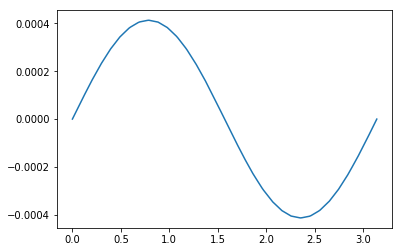

In [2]:
plt.plot(z_plot, fun_Bx(z_plot), label = 'projected')

In [3]:
def integrator_easy(ex, ey, bx, by, yx, yy, dt):
    
    ex_new = ex + dt*c**2*np.dot(mass_0_inv, np.dot(np.transpose(G), np.dot(mass_1, by))) - yx
    ey_new = ey - dt*c**2*np.dot(mass_0_inv, np.dot(np.transpose(G), np.dot(mass_1, bx))) - yy
    
    bx_new = bx + dt*np.dot(G, ey)
    by_new = by - dt*np.dot(G, ex)
    
    yx_new = yx + dt*eps0*wpe**2*ex + wce*yy
    yy_new = yy + dt*eps0*wpe**2*ey - wce*yx
    
    return ex_new, ey_new, bx_new, by_new, yx_new, yy_new

In [4]:
# unit test for integrator_Hz

'''
Np = 2
zp = np.array([el_b[2] + 0.05])
vz = np.array([-1])
dt = 3*dz

print('z_start = ', zp)
print('z_end = ', (zp + dt*vz)%Lz)
print('vz = ', vz)
print('el_b = ', el_b)


z_end, IQ = integrator_Hz(bx, by, zp, particles[:, 1], particles[:, 2], vz, dt)

print(IQ.toarray())
'''

"\nNp = 2\nzp = np.array([el_b[2] + 0.05])\nvz = np.array([-1])\ndt = 3*dz\n\nprint('z_start = ', zp)\nprint('z_end = ', (zp + dt*vz)%Lz)\nprint('vz = ', vz)\nprint('el_b = ', el_b)\n\n\nz_end, IQ = integrator_Hz(bx, by, zp, particles[:, 1], particles[:, 2], vz, dt)\n\nprint(IQ.toarray())\n"

In [5]:
# time integration
Nt = np.int(T/dt)
en_B = np.array([])

counter = 0


ex_n = deepcopy(ex)
ey_n = deepcopy(ey)
bx_n = deepcopy(bx)
by_n = deepcopy(by)
yx_n = deepcopy(yx)
yy_n = deepcopy(yy)

while counter < Nt:
    
    ex_old = deepcopy(ex)
    ey_old = deepcopy(ey)
    bx_old = deepcopy(bx)
    by_old = deepcopy(by)
    yx_old = deepcopy(yx)
    yy_old = deepcopy(yy)
    
    # ... Lie-Trotter-splitting
    
    # ... HE-integrator
    bx, by, yx, yy, particles[:, 1], particles[:, 2] = integr.integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], G, Q0, eps0, wpe, qe, me, dt)
    # ...
    
    
    # ... HB-integrator
    ex, ey = integr.integrator_HB(ex, ey, bx, by, mass_0_inv, G, mass_1, c, dt)
    # ...
    
    # HY-integrator
    ex, ey, yx, yy = integr.integrator_HY(ex, ey, yx, yy, eps0, wce, (counter + 1)*dt, counter*dt)
    #print('HY-integrator finished')
    
    #ex, ey, bx, by, yx, yy = integrator_easy(ex, ey, bx, by, yx, yy, dt)
    
    # Hx-integrator
    #ex, particles[:, 3] = integrator_Hx(ex, particles[:, 1], particles[:, 3], Q0, W, By, dt)
    #print('Hx-integrator finished')
    
    #particles[:, 4] = 1/Np*(w0 - Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0)
    #W = sc.sparse.csr_matrix((particles[:, 4], (np.arange(Np), np.arange(Np))), shape = (Np, Np))
    
    
    # Hy-integrator
    #ey, particles[:, 3] = integrator_Hy(ey, particles[:, 2], particles[:, 3], Q0, W, Bx, dt)
    #print('Hy-integrator finished')
    
    #particles[:, 4] = 1/Np*(w0 - Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0)
    #W = sc.sparse.csr_matrix((particles[:, 4], (np.arange(Np), np.arange(Np))), shape = (Np, Np))
    
    
    # Hz-integrator
    #particles[:, 0], particles[:, 1], particles[:, 2] = integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], dt)
    #print('Hz-integrator finished')
    
    #particles[:, 4] = 1/Np*(w0 - Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0)
    #W = sc.sparse.csr_matrix((particles[:, 4], (np.arange(Np), np.arange(Np))), shape = (Np, Np))
    
    
    # ... assemble matrices Q0, Q1 and B1
    #Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
    #Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

    #bx_temp = Q1.transpose().dot(bx)
    #by_temp = Q1.transpose().dot(by)

    #Bx = sc.sparse.csr_matrix((bx_temp, (np.arange(Np), np.arange(Np))), shape = (Np, Np))
    #By = sc.sparse.csr_matrix((by_temp, (np.arange(Np), np.arange(Np))), shape = (Np, Np))
    # ...
    
    en_B = np.append(en_B, np.dot(bx, np.dot(mass_1, bx)) + np.dot(by, np.dot(mass_1, by)))
    
    ex_n = np.vstack((ex_n, ex))
    ey_n = np.vstack((ey_n, ey))
    bx_n = np.vstack((bx_n, bx))
    by_n = np.vstack((by_n, by))
    yx_n = np.vstack((yx_n, yx))
    yy_n = np.vstack((yy_n, yy))
    
    counter += 1
    print('steps finished : ' + str(counter))

steps finished : 1
steps finished : 2
steps finished : 3
steps finished : 4
steps finished : 5
steps finished : 6
steps finished : 7
steps finished : 8
steps finished : 9
steps finished : 10
steps finished : 11
steps finished : 12
steps finished : 13
steps finished : 14
steps finished : 15
steps finished : 16
steps finished : 17
steps finished : 18
steps finished : 19
steps finished : 20
steps finished : 21
steps finished : 22
steps finished : 23
steps finished : 24
steps finished : 25
steps finished : 26
steps finished : 27
steps finished : 28
steps finished : 29
steps finished : 30
steps finished : 31
steps finished : 32
steps finished : 33
steps finished : 34
steps finished : 35
steps finished : 36
steps finished : 37
steps finished : 38
steps finished : 39
steps finished : 40
steps finished : 41
steps finished : 42
steps finished : 43
steps finished : 44
steps finished : 45
steps finished : 46
steps finished : 47
steps finished : 48
steps finished : 49
steps finished : 50
steps fin

steps finished : 434
steps finished : 435
steps finished : 436
steps finished : 437
steps finished : 438
steps finished : 439
steps finished : 440
steps finished : 441
steps finished : 442
steps finished : 443
steps finished : 444
steps finished : 445
steps finished : 446
steps finished : 447
steps finished : 448
steps finished : 449
steps finished : 450
steps finished : 451
steps finished : 452
steps finished : 453
steps finished : 454
steps finished : 455
steps finished : 456
steps finished : 457
steps finished : 458
steps finished : 459
steps finished : 460
steps finished : 461
steps finished : 462
steps finished : 463
steps finished : 464
steps finished : 465
steps finished : 466
steps finished : 467
steps finished : 468
steps finished : 469
steps finished : 470
steps finished : 471
steps finished : 472
steps finished : 473
steps finished : 474
steps finished : 475
steps finished : 476
steps finished : 477
steps finished : 478
steps finished : 479
steps finished : 480
steps finishe

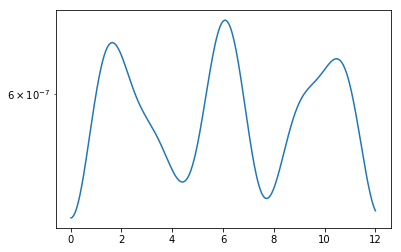

In [6]:
tn = np.linspace(0, counter*dt, counter + 1)
plt.semilogy(tn[1:], en_B)

Start to prepare animation!
Number of frames: 60
Frames finished: 0
Frames finished: 50



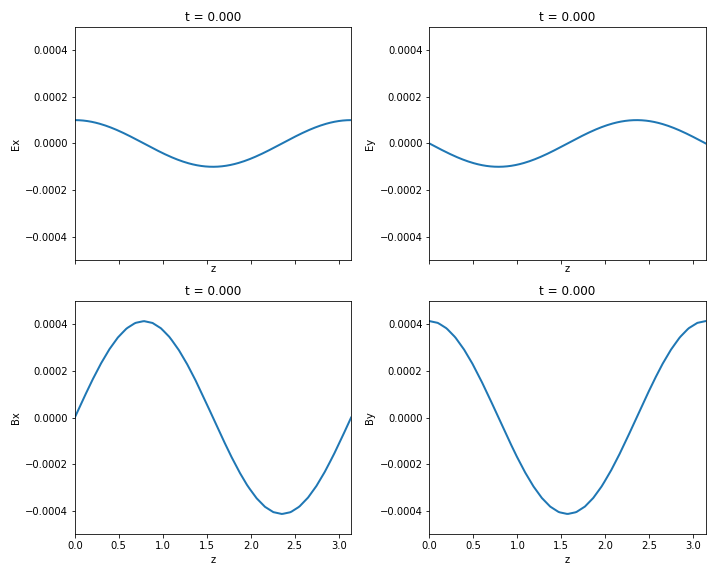
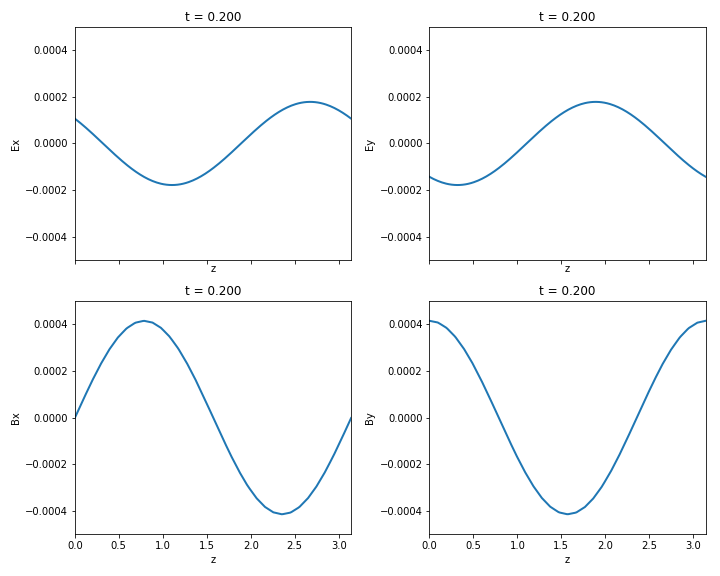
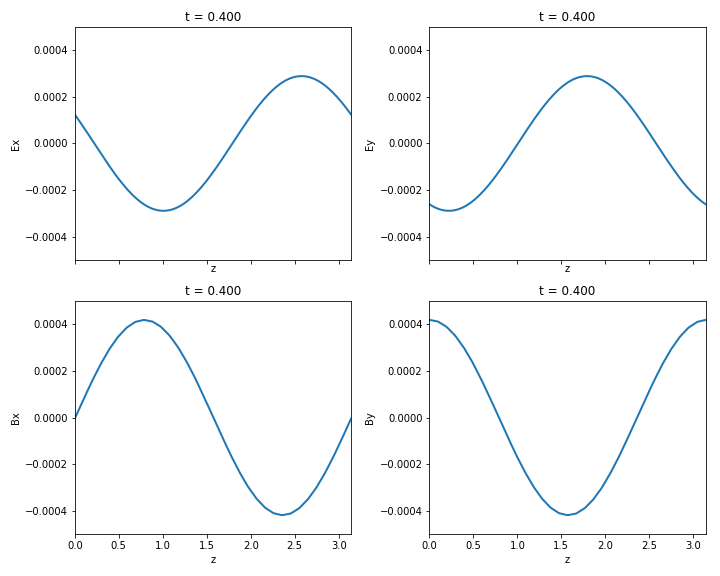
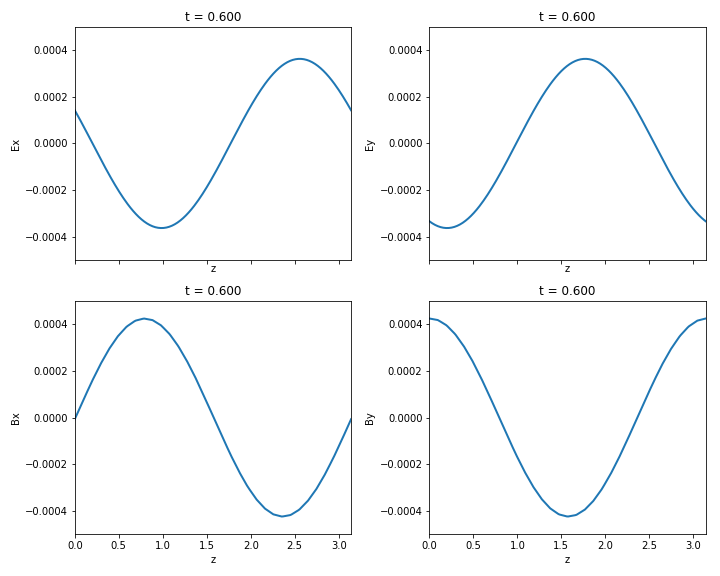
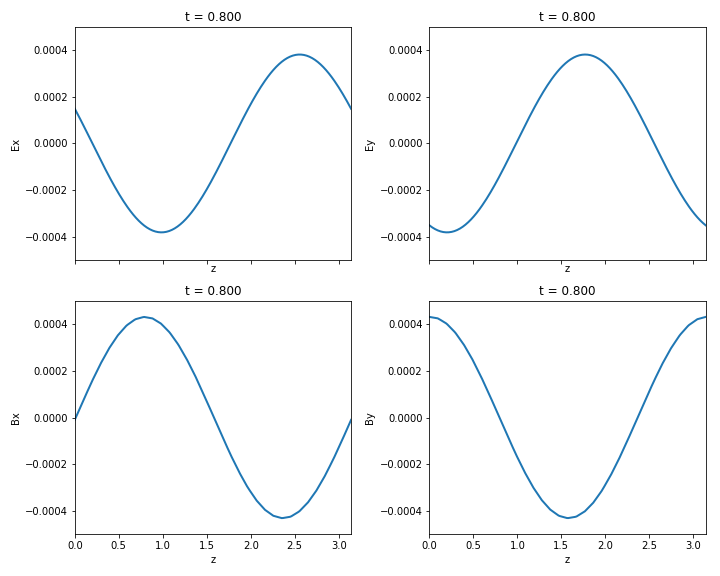
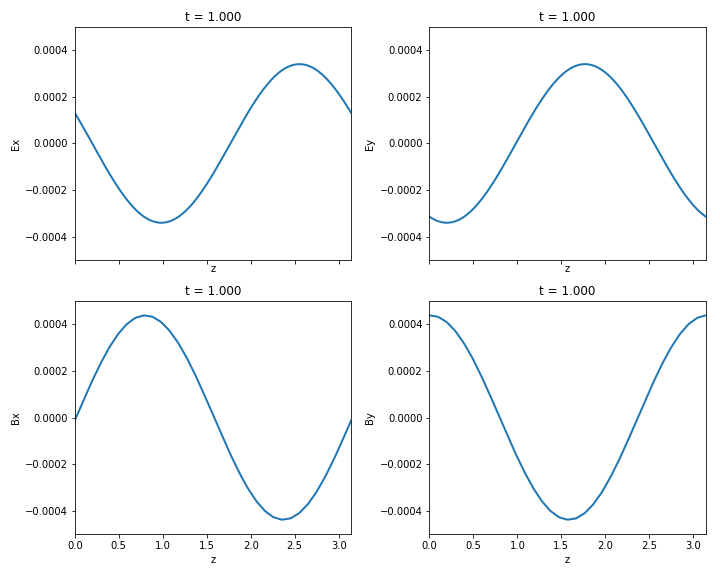
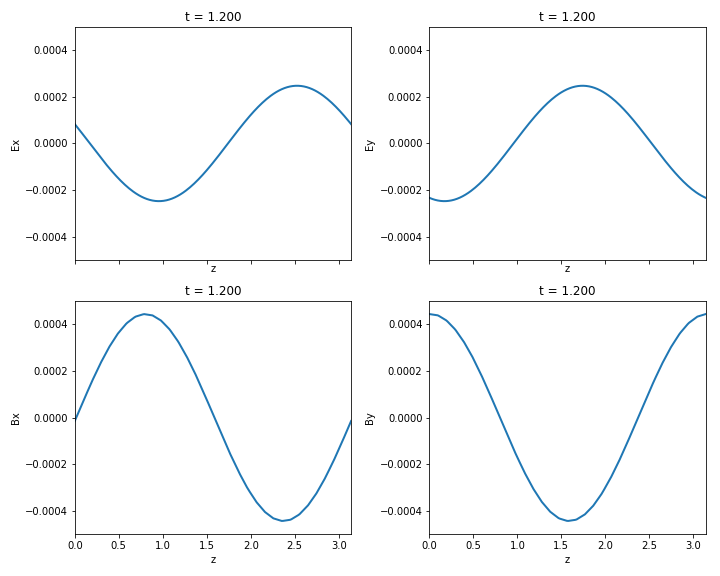
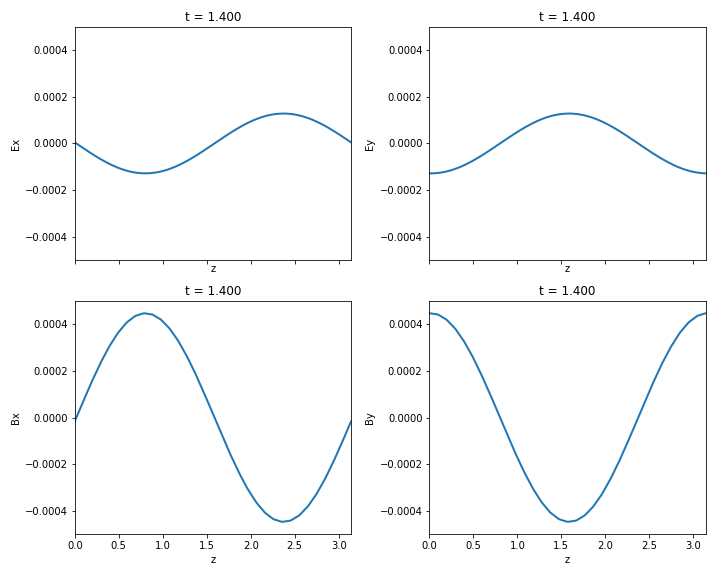
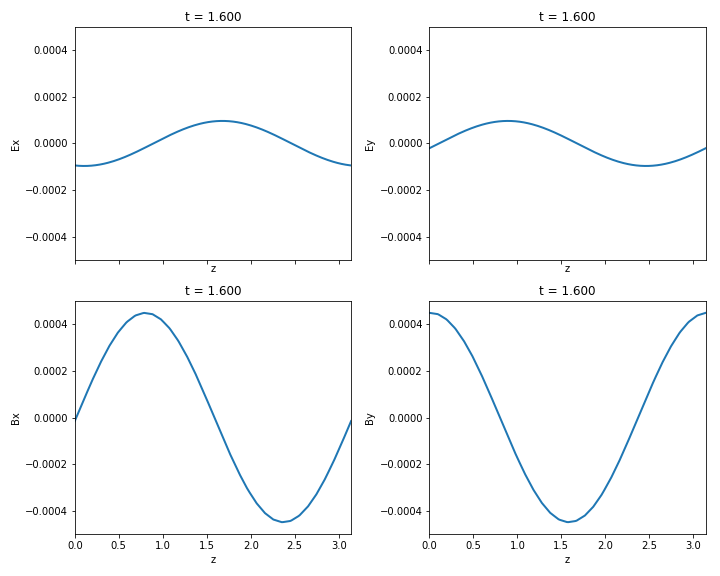
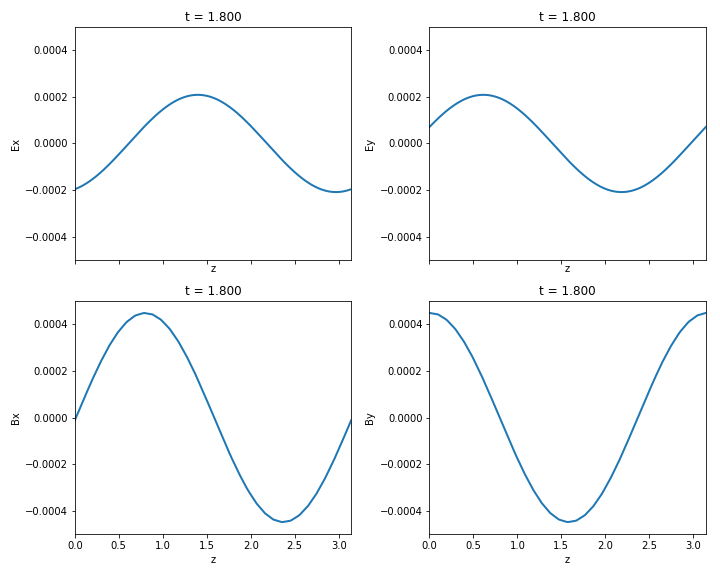
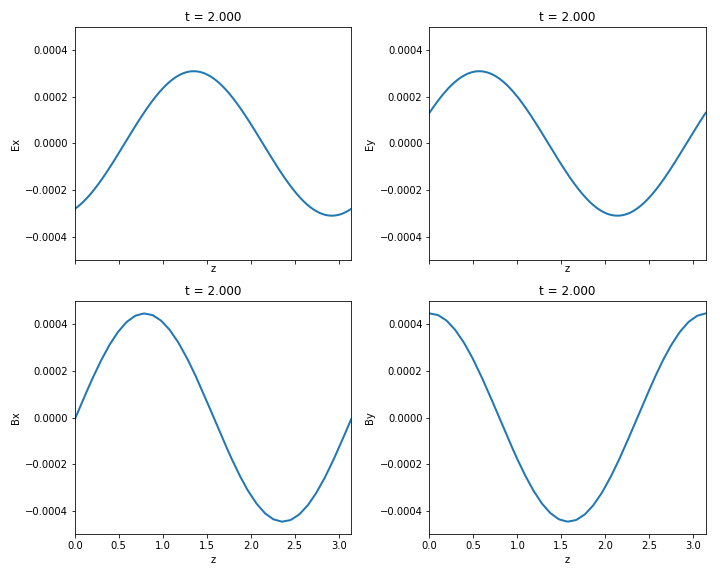
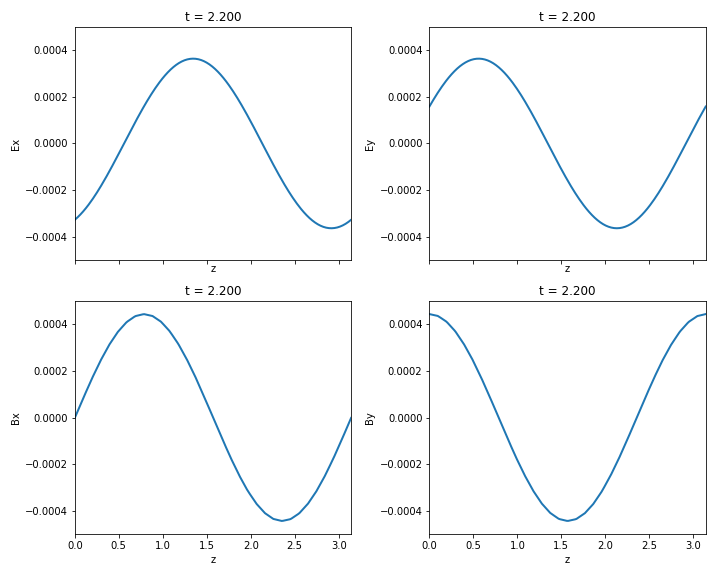
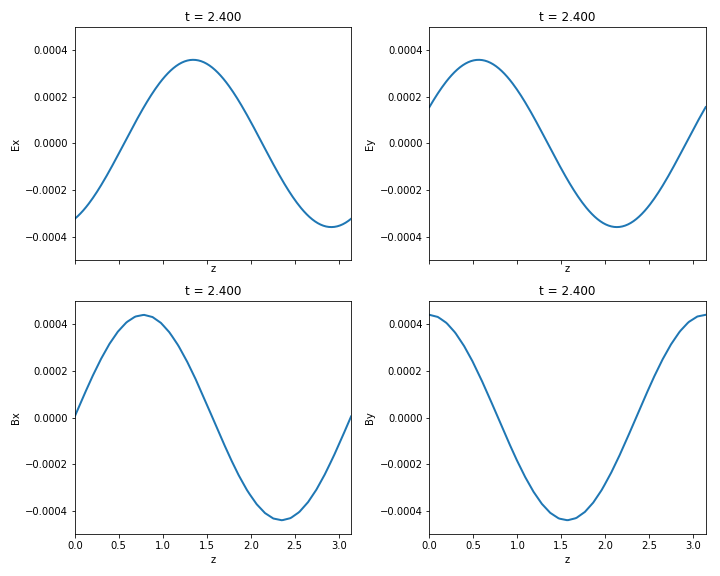
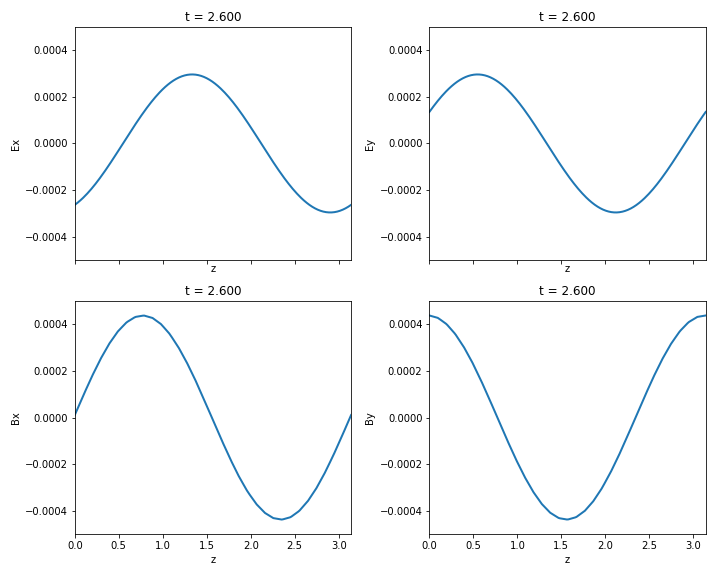
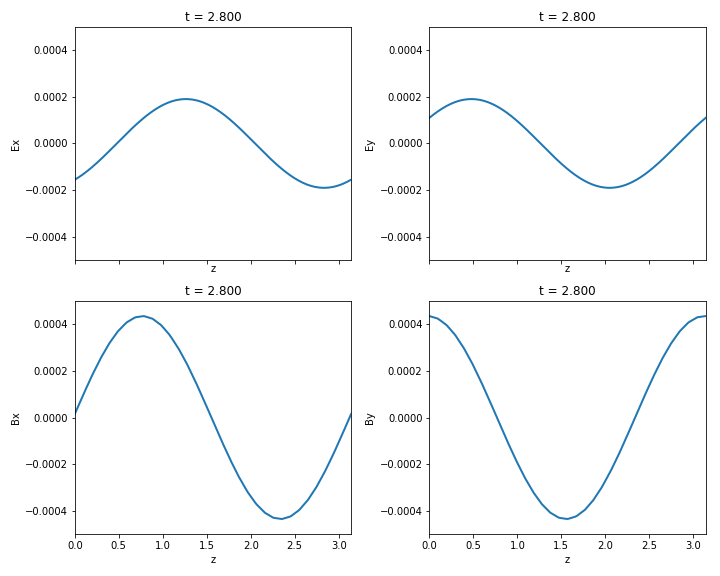
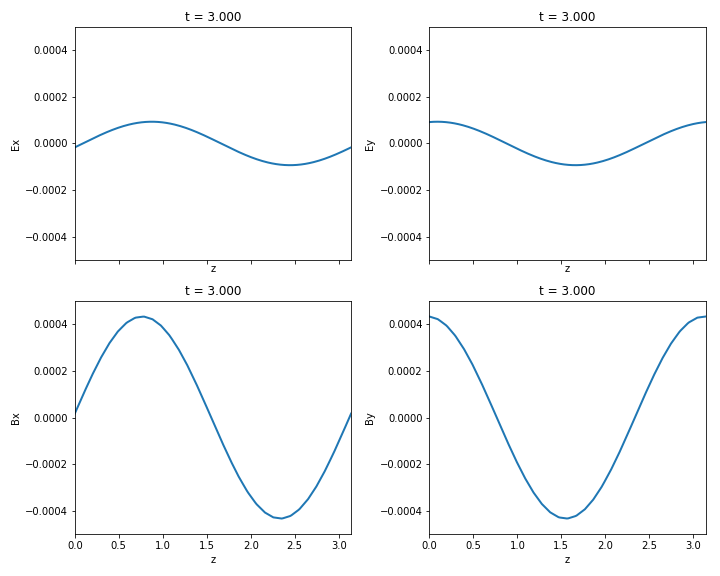
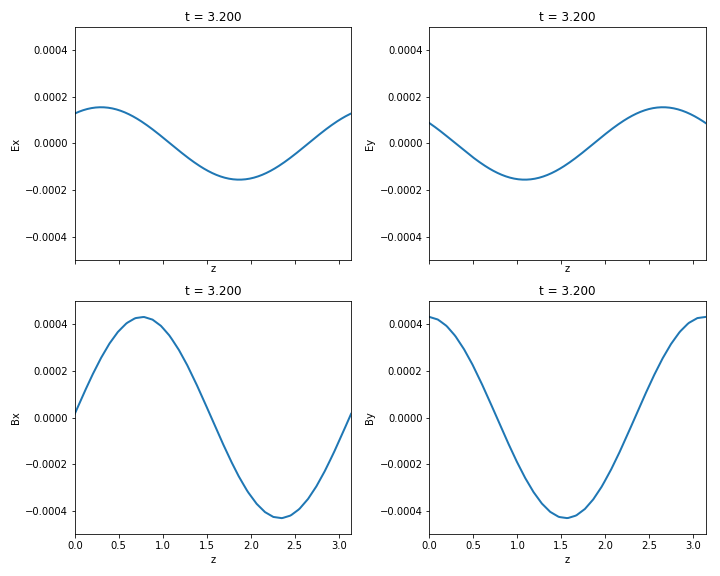
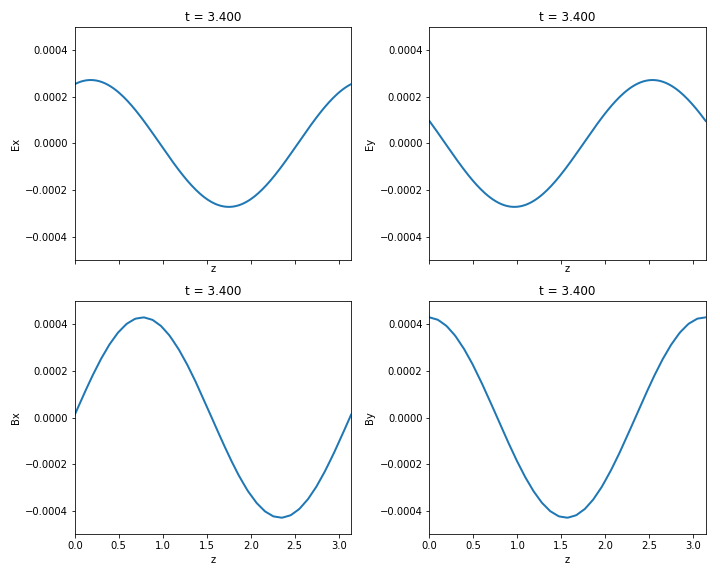
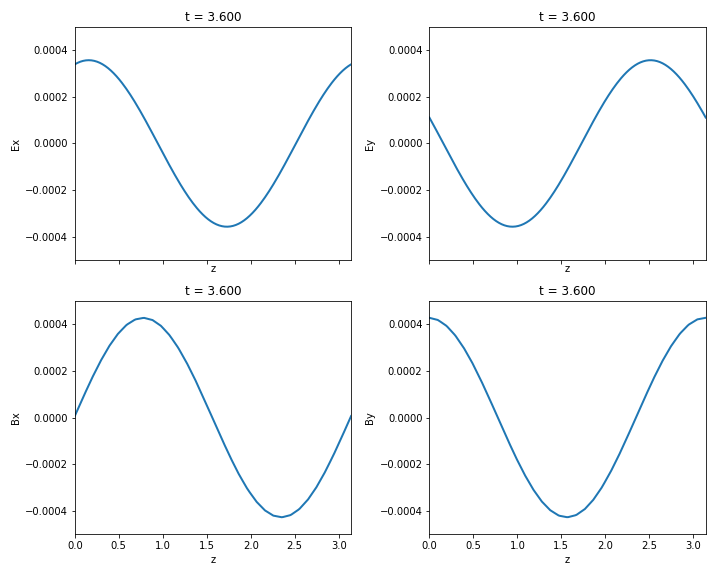
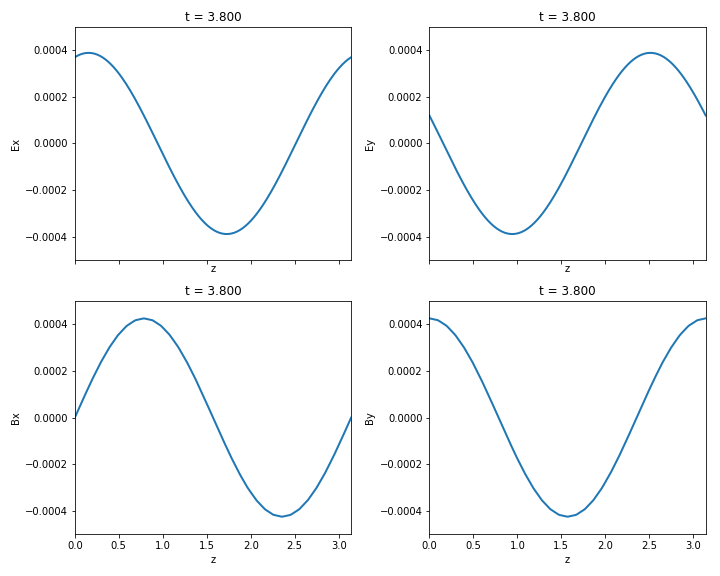
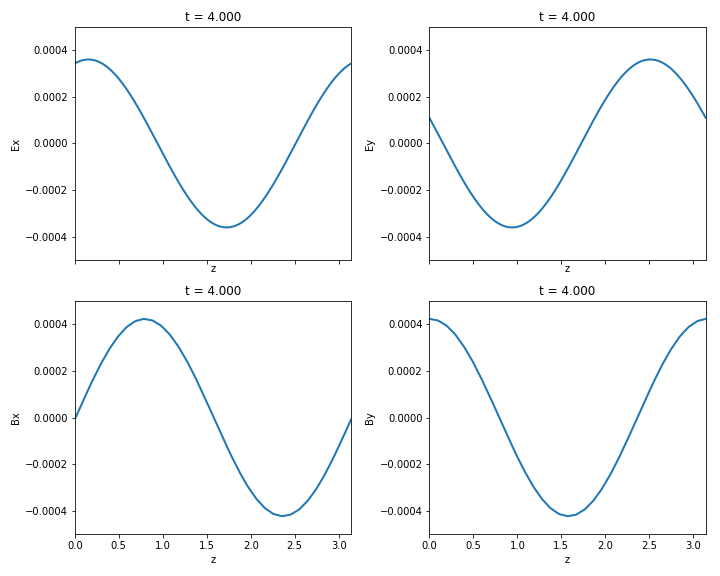
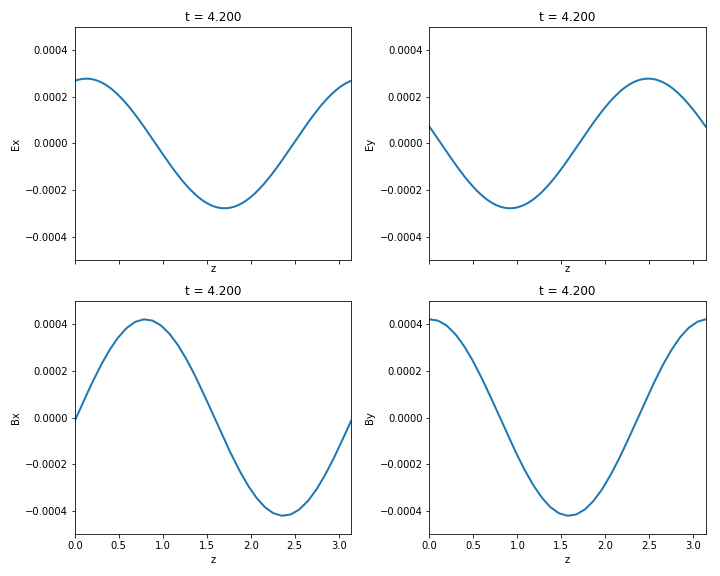
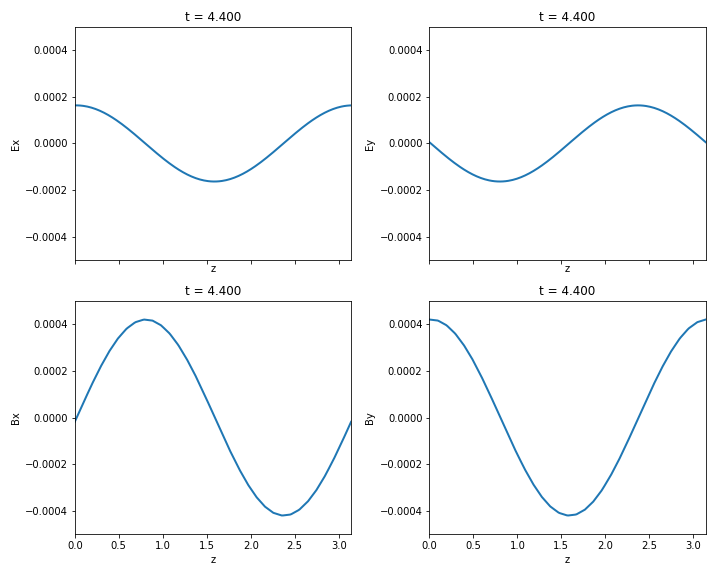
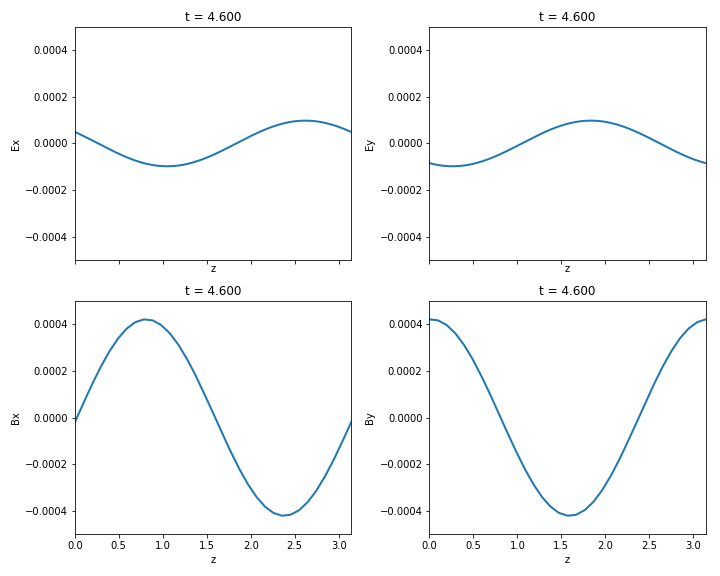
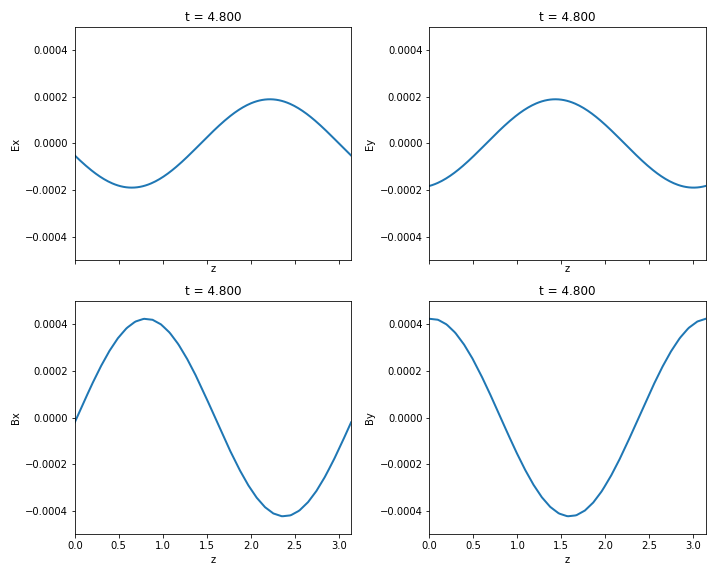
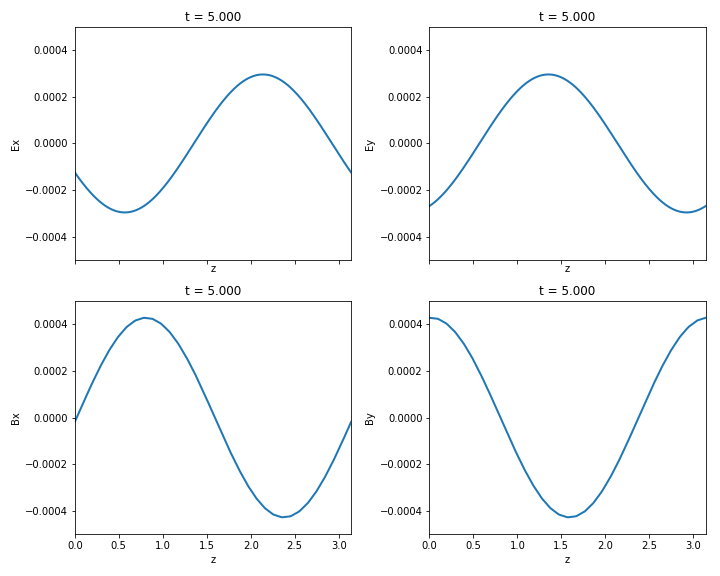
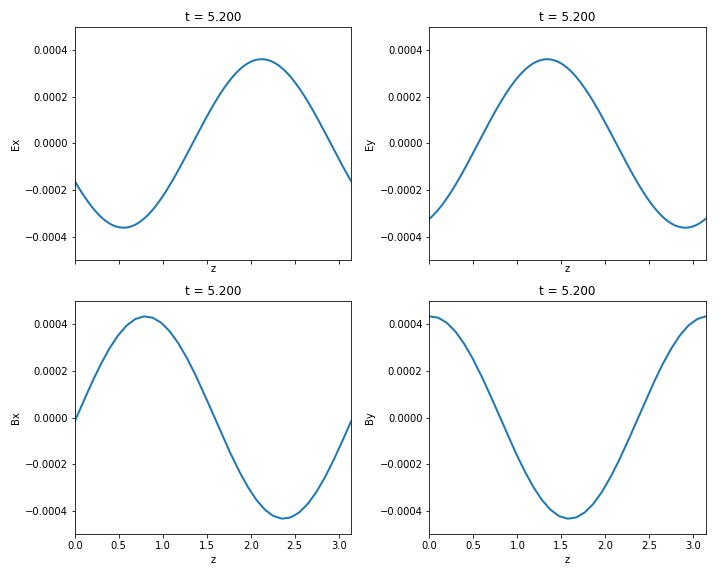
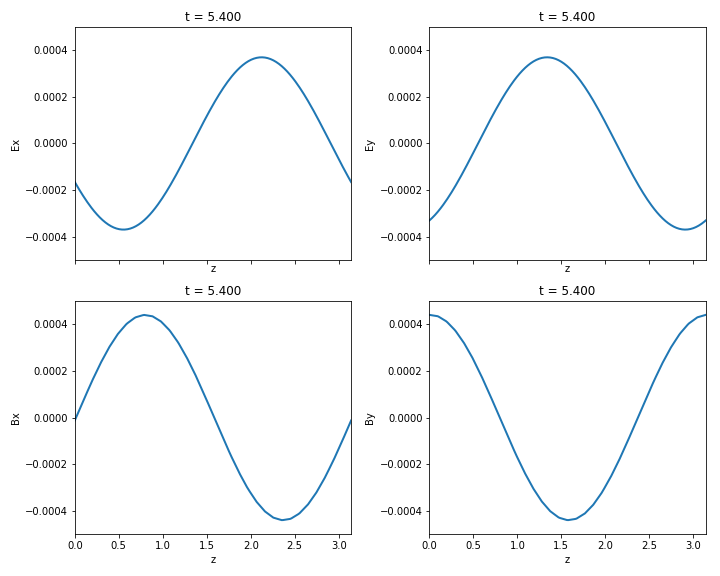
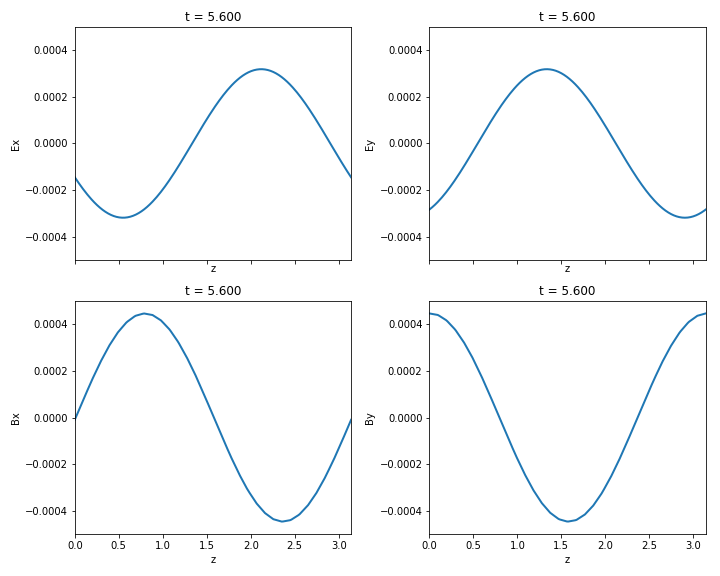
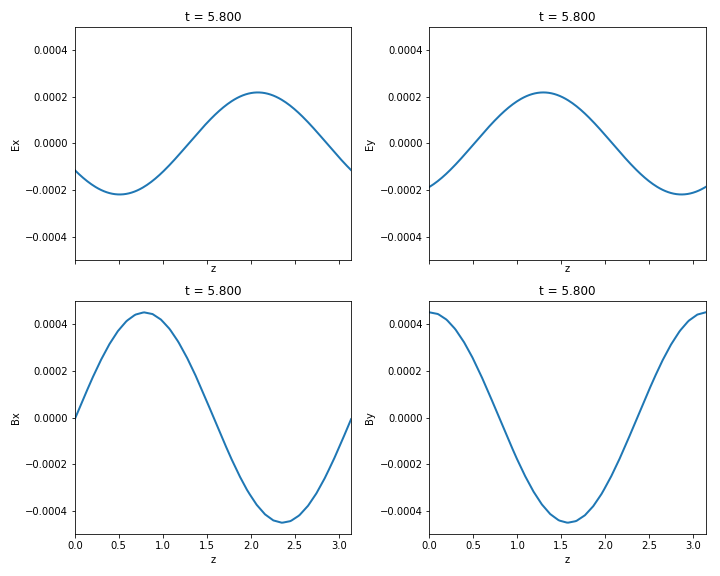
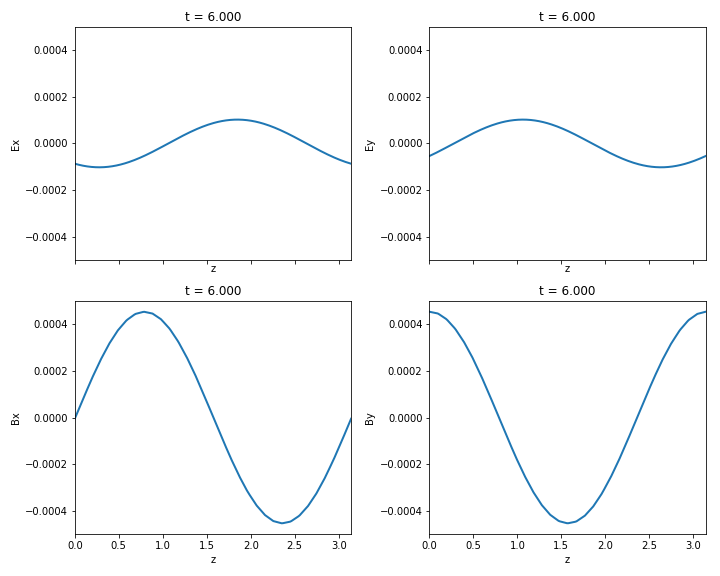
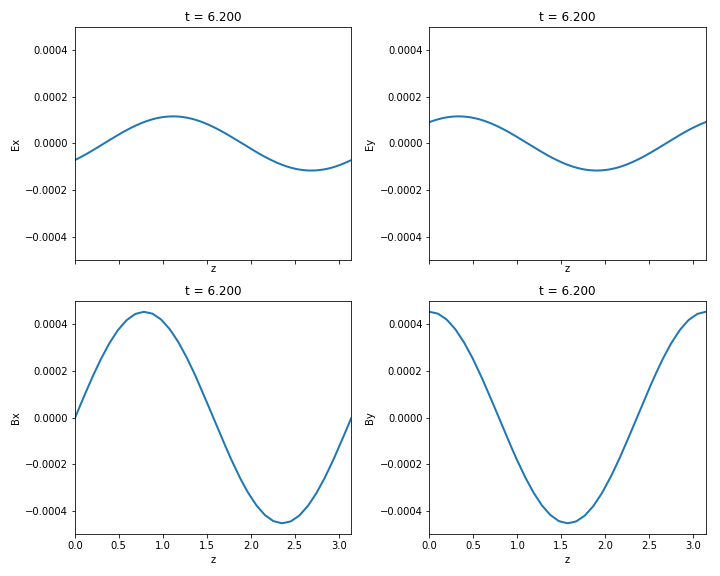
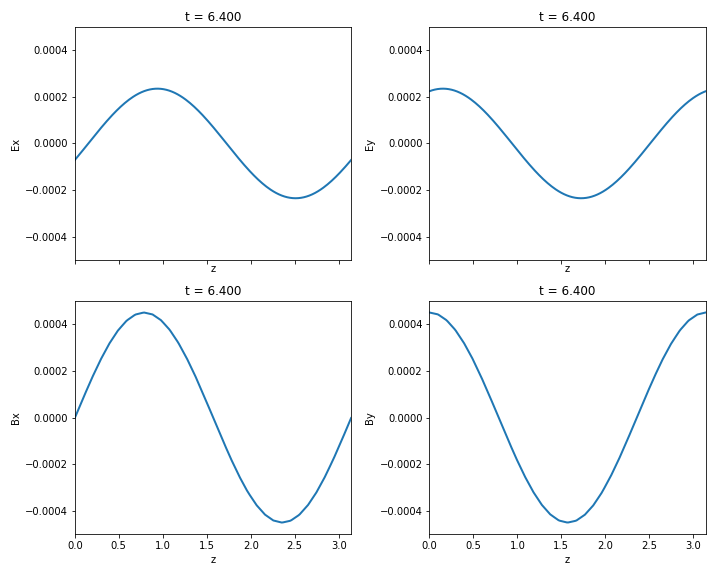
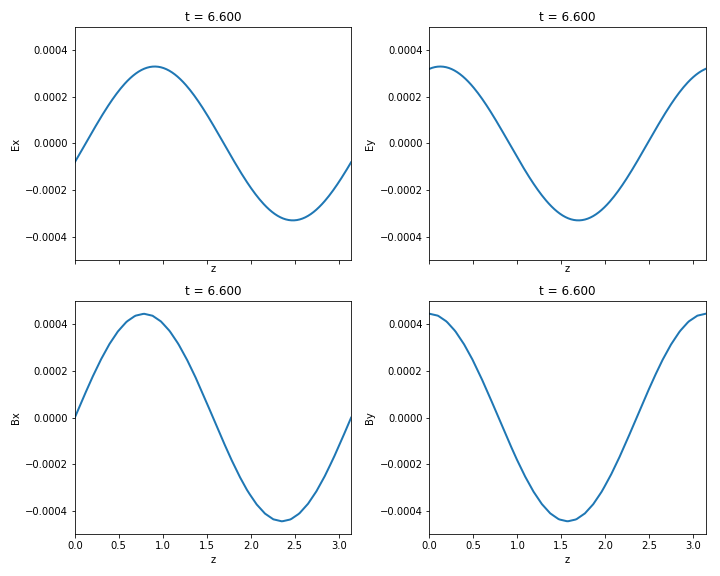
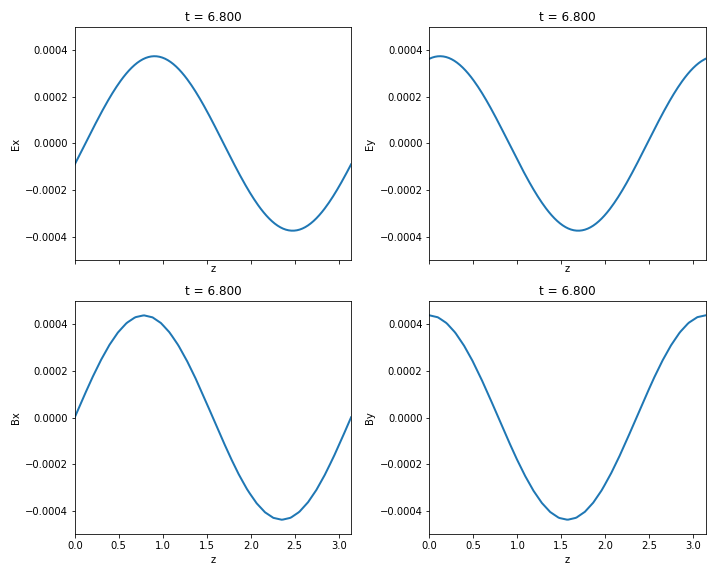
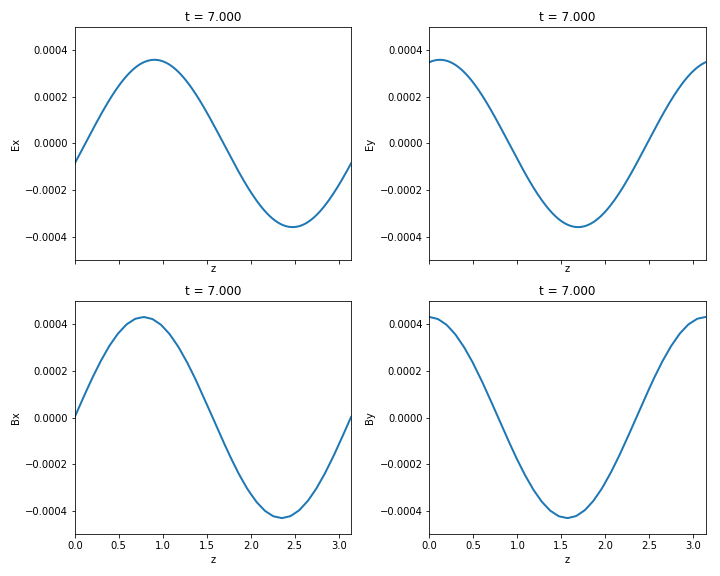
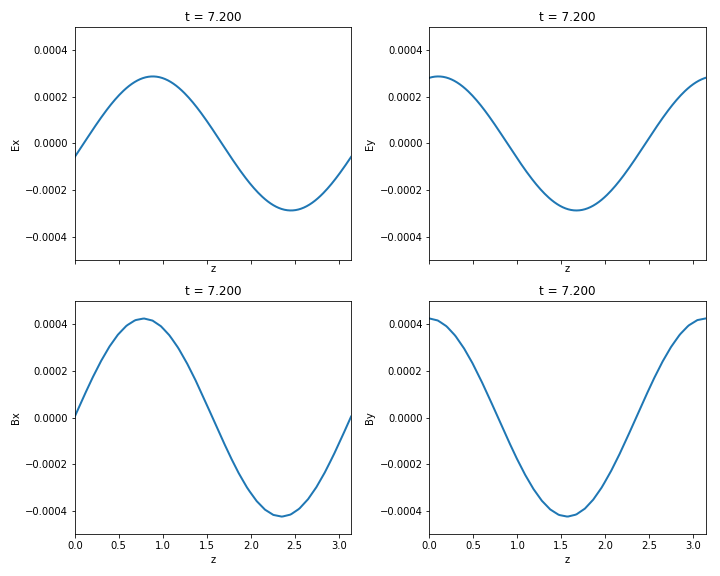
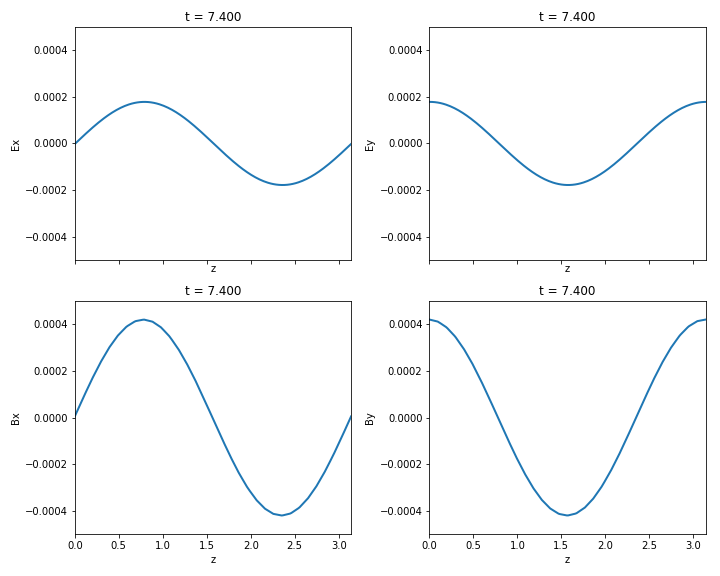
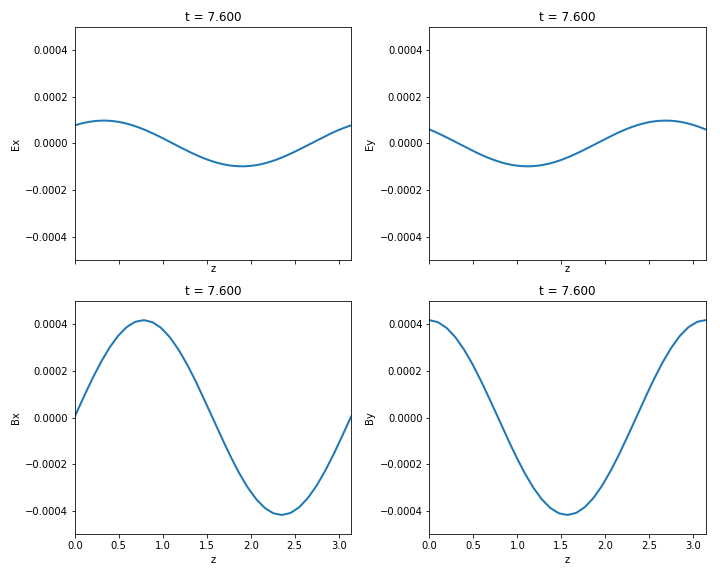
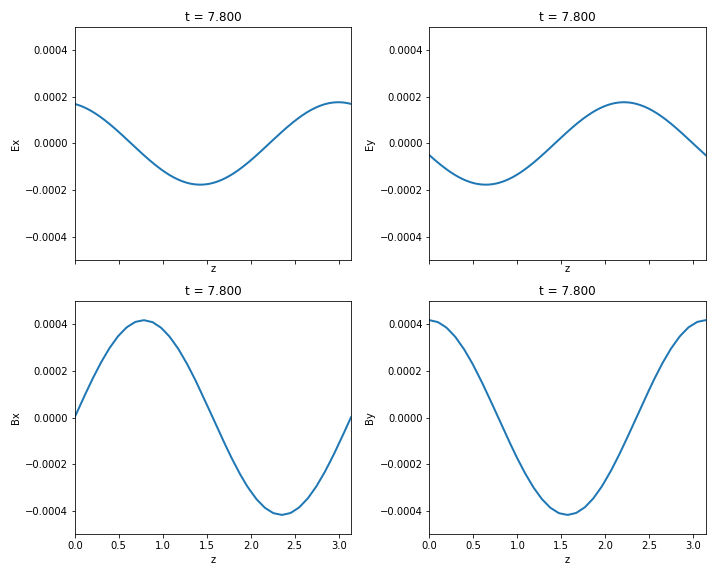
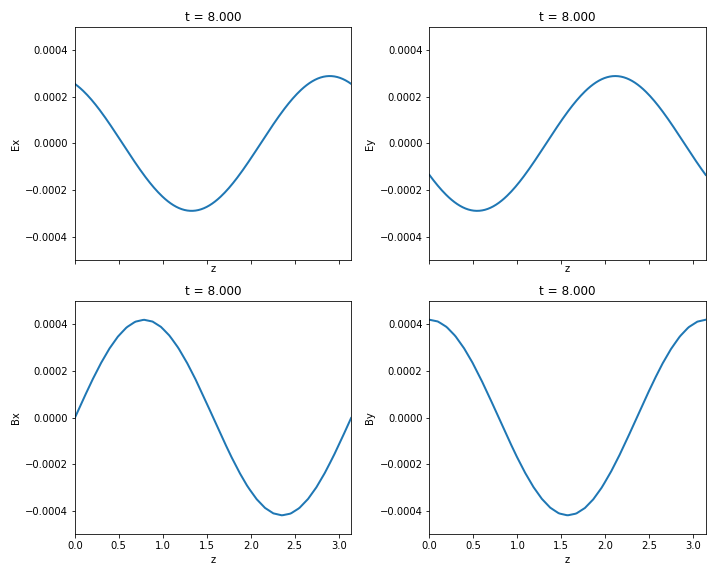
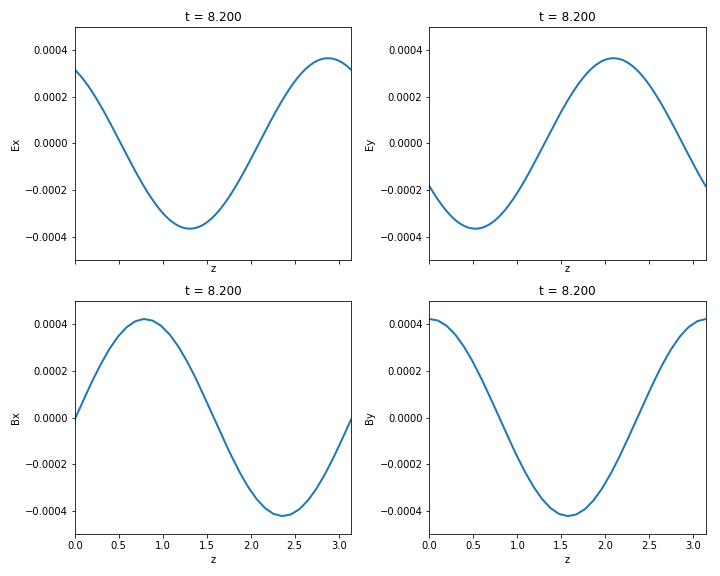
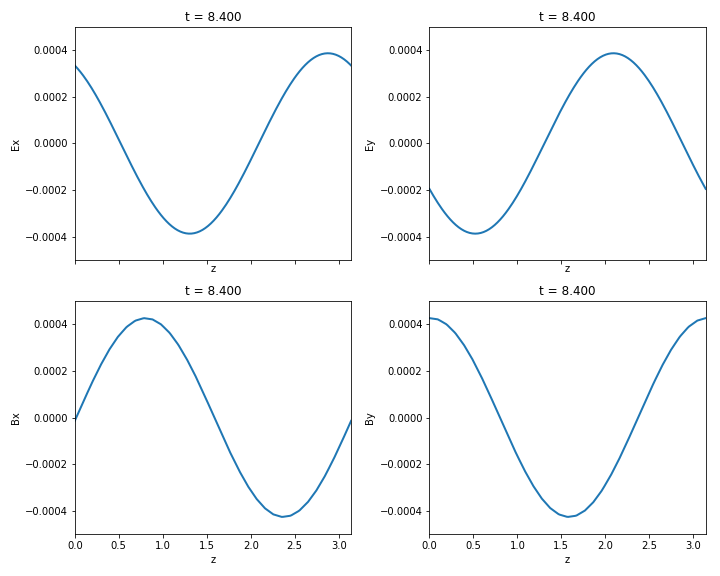
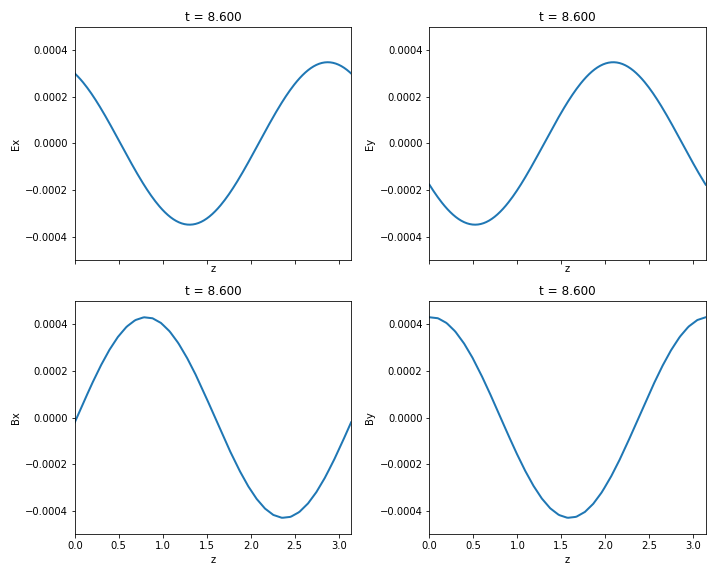
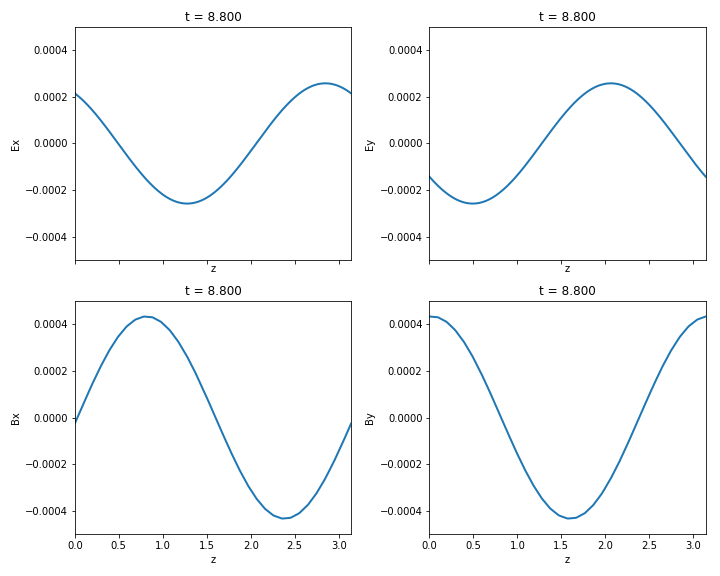
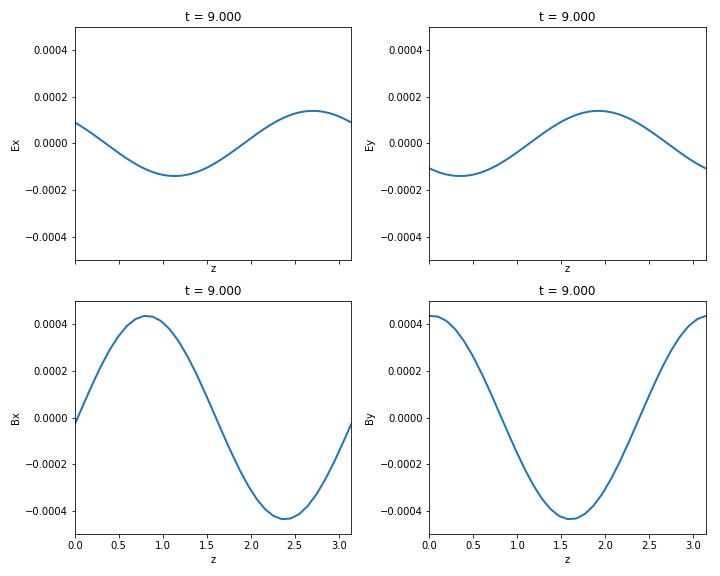
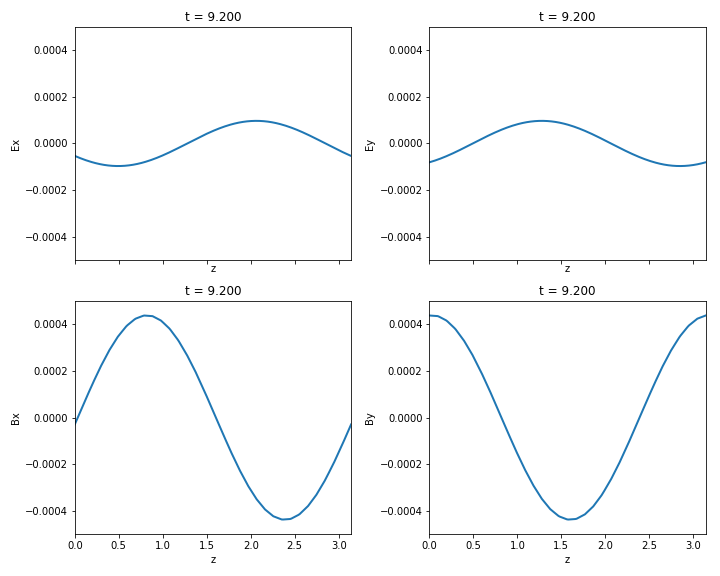
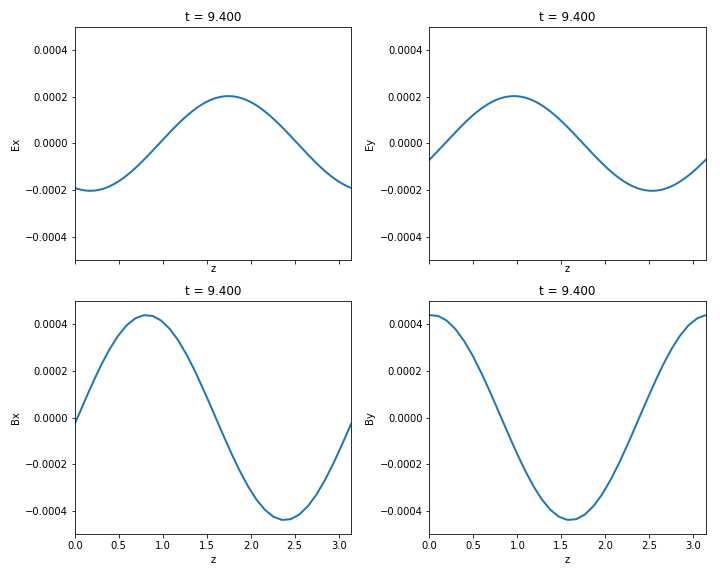
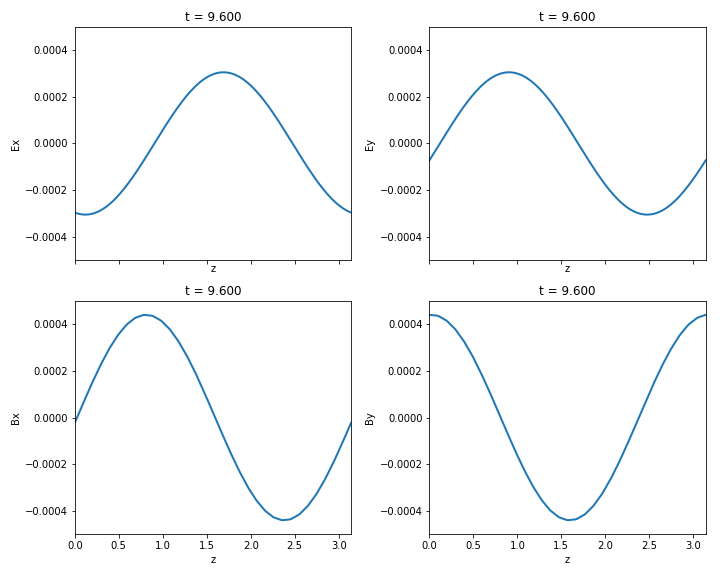
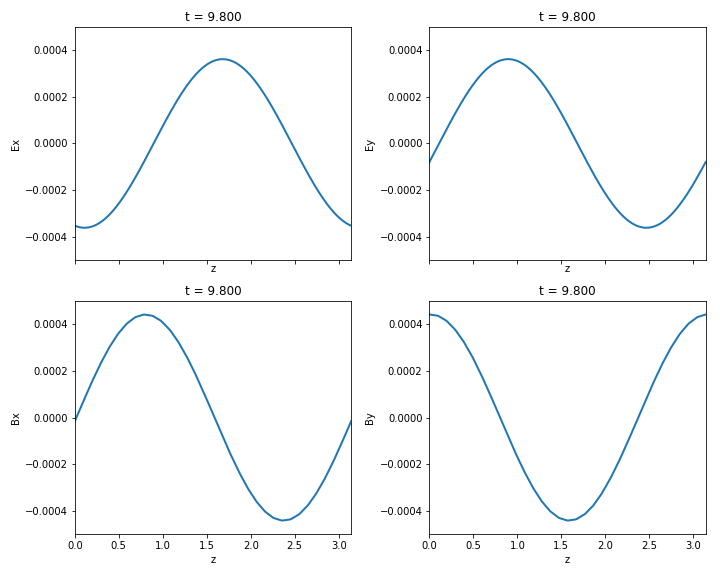
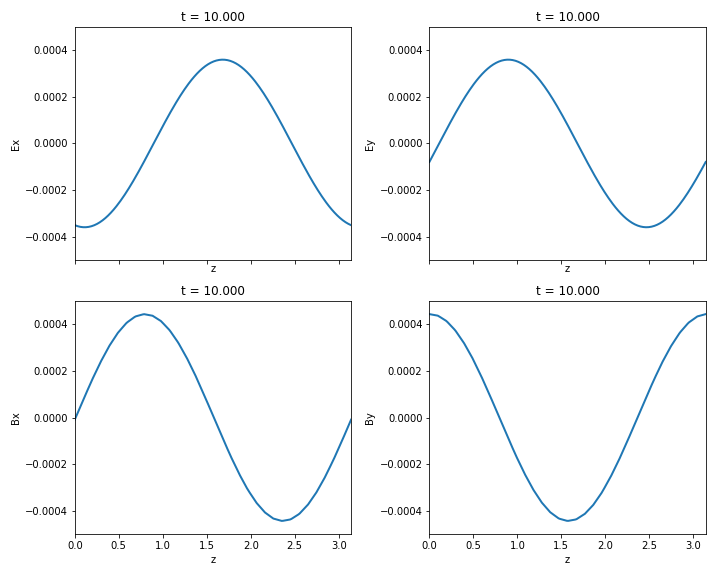
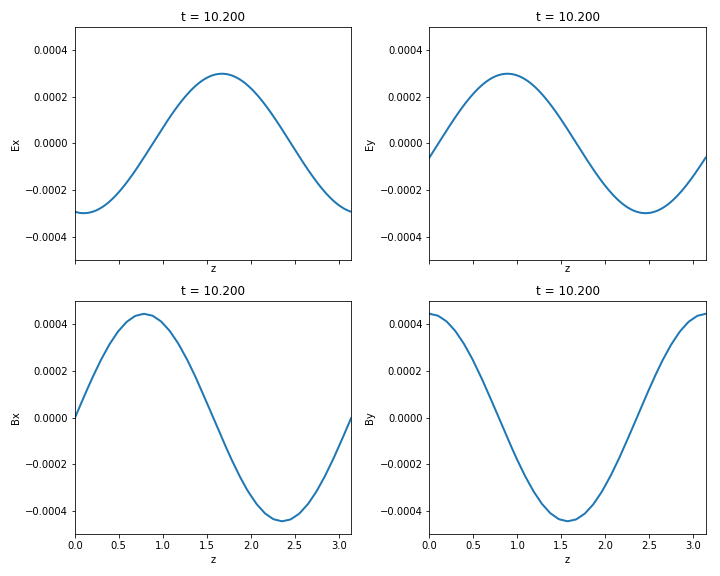
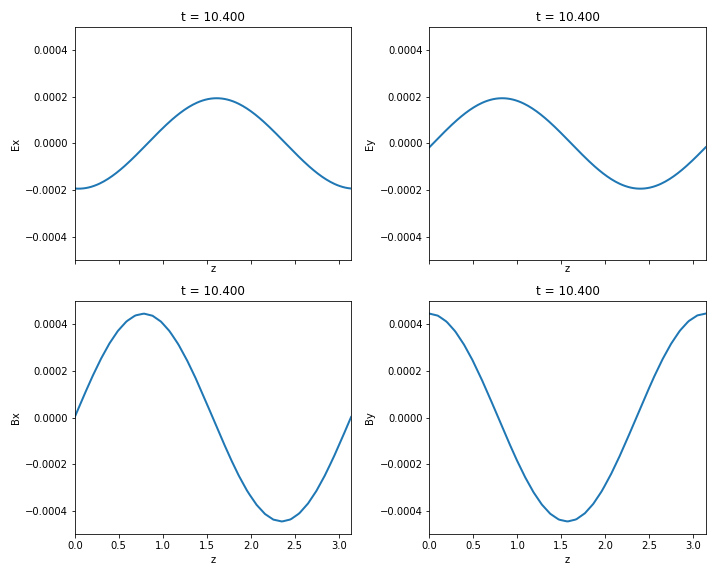
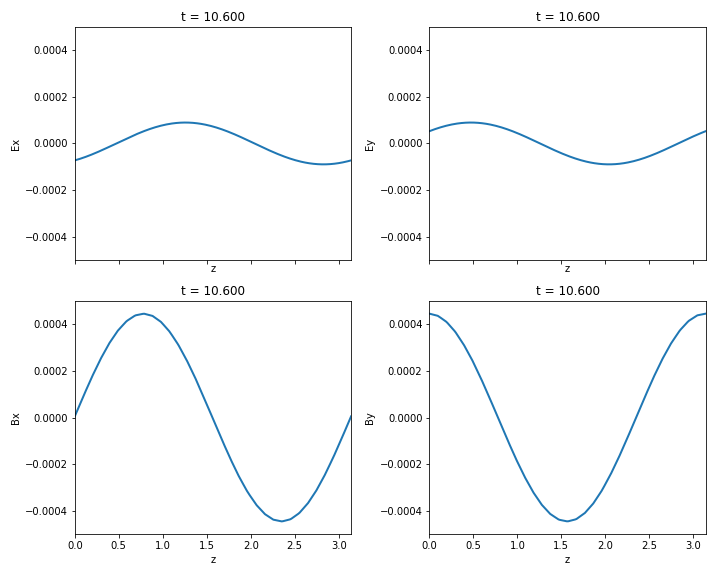
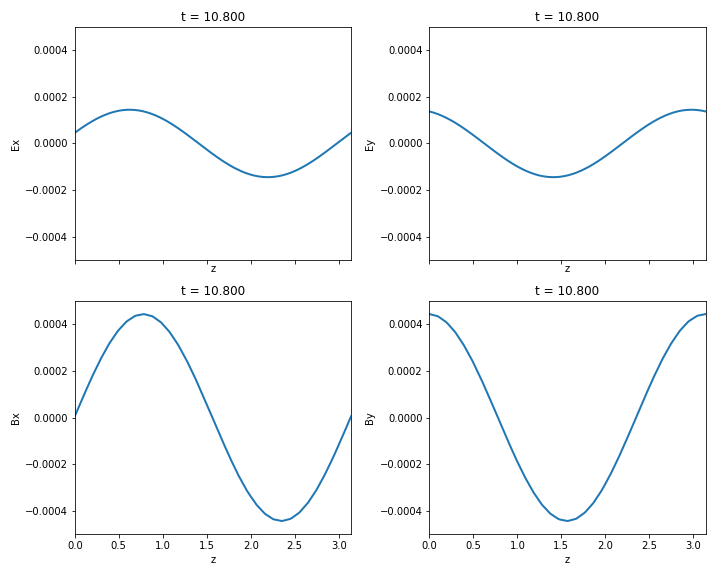
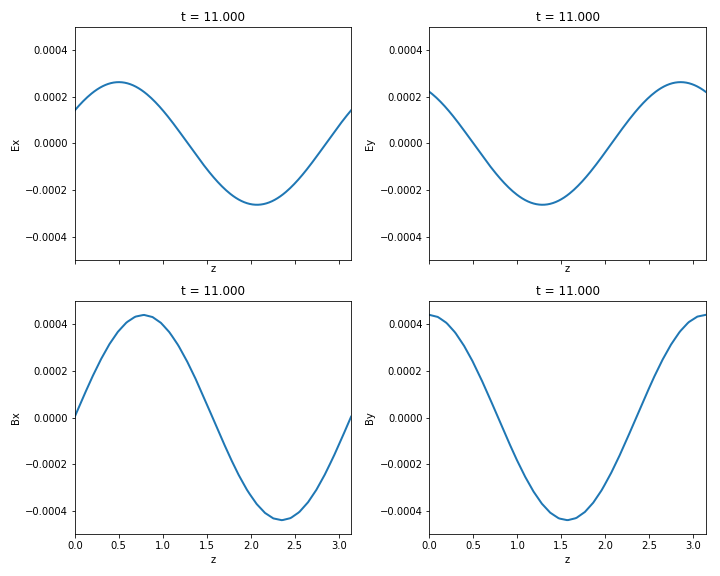
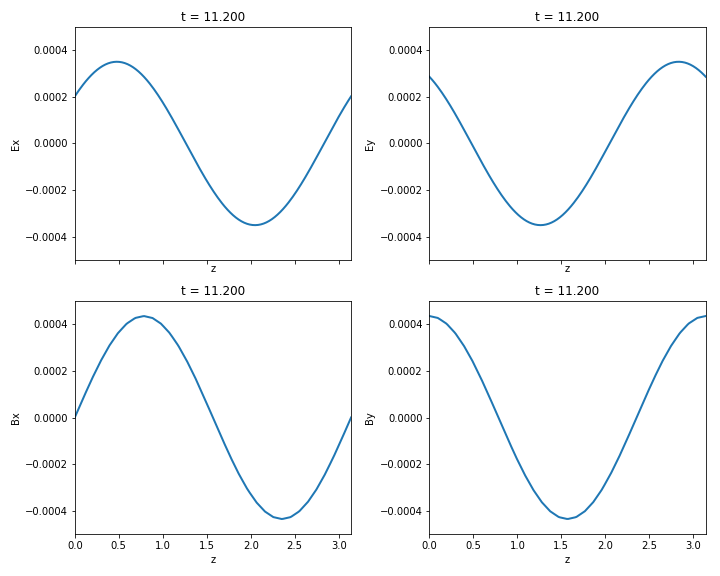
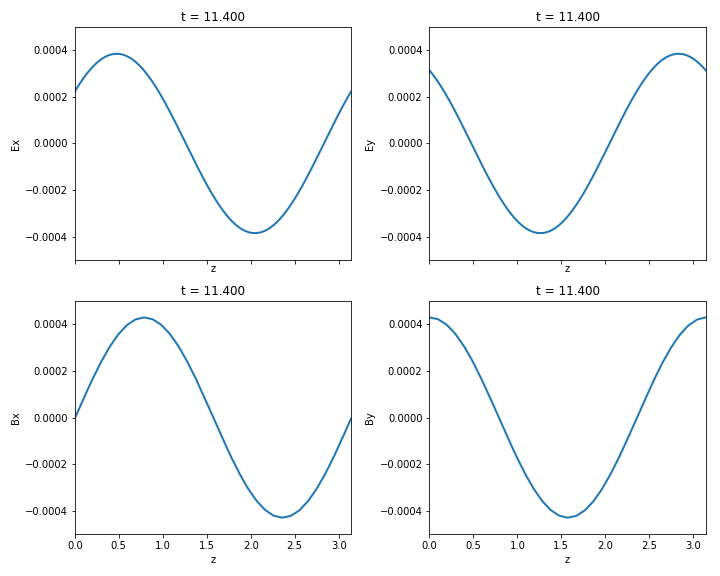
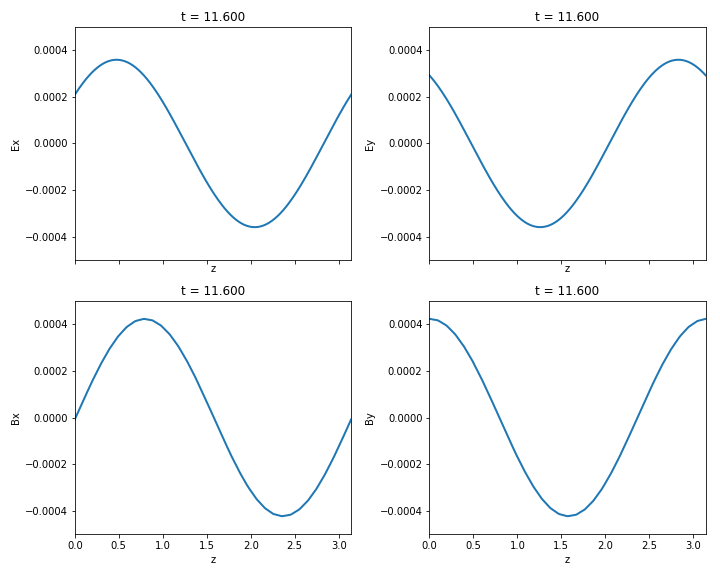
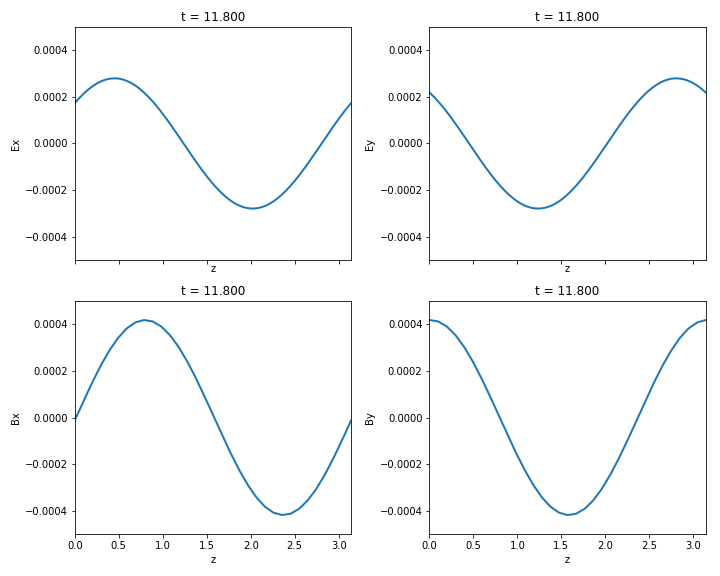

In [7]:
from JSAnimation import IPython_display
from matplotlib import animation

fr = 10
    
print('Start to prepare animation!')
print('Number of frames: ' + str(int(counter/fr)))

f2, ((a1, a2), (a3, a4)) = plt.subplots(2, 2, sharex = 'col')
f2.set_figheight(8)
f2.set_figwidth(10)

a1.set_title('t = 0.000')
a2.set_title('t = 0.000')
a3.set_title('t = 0.000')
a4.set_title('t = 0.000')

a1.set_xlim((0, Lz))
a1.set_ylim((-5*amp,5*amp))

a2.set_xlim((0, Lz))
a2.set_ylim((-5*amp,5*amp))

a3.set_xlim((0, Lz))
a3.set_ylim((-5*amp,5*amp))

a4.set_xlim((0, Lz))
a4.set_ylim((-5*amp,5*amp))


a1.set_ylabel('Ex')
a2.set_ylabel('Ey')
a3.set_ylabel('Bx')
a4.set_ylabel('By')




line1, = a1.plot([],[], lw = 2)
line2, = a2.plot([],[], lw = 2)
line3, = a3.plot([],[], lw = 2)
line4, = a4.plot([],[], lw = 2)


a1.set_xlabel('z')
a2.set_xlabel('z')
a3.set_xlabel('z')
a4.set_xlabel('z')


plt.subplots_adjust(wspace = 0.25, hspace = 0.3)
plt.tight_layout()

def init():  

    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])

    return line1,




def animate(i):
    
    ti = int(fr*i)

    if i%50 == 0:
        print('Frames finished: ' + str(i))

    fun_Ex_ani = fem.lag_fun(ex_n[ti], shapefun.eta, el_b, basis = 1, bcs = 1)[2] 
    fun_Ey_ani = fem.lag_fun(ey_n[ti], shapefun.eta, el_b, basis = 1, bcs = 1)[2] 
    fun_Bx_ani = fem.lag_fun(bx_n[ti], shapefun.chi, el_b, basis = 2, bcs = 1)[2] 
    fun_By_ani = fem.lag_fun(by_n[ti], shapefun.chi, el_b, basis = 2, bcs = 1)[2] 
    
    line1.set_data(z_plot, fun_Ex_ani(z_plot))
    line2.set_data(z_plot, fun_Ey_ani(z_plot))
    line3.set_data(z_plot, fun_Bx_ani(z_plot))
    line4.set_data(z_plot, fun_By_ani(z_plot))
    
    a1.set_title('t = '+'%.3f' % tn[ti])
    a2.set_title('t = '+'%.3f' % tn[ti])
    a3.set_title('t = '+'%.3f' % tn[ti])
    a4.set_title('t = '+'%.3f' % tn[ti])
   

    return line1,

animation.FuncAnimation(f2, animate, init_func = init, frames = int(counter/fr), interval = 50, blit = True)